# Running HDBSCAN on different combinations of abundances

In [7]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table, join, Column
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler

In [29]:
apogee = Table.read("/Users/chloerenard-robins/Downloads/APOGEE_red_clump.fits")[0:50000]

In [31]:
apogee

<Table length=45709>
                FILE                ...        VISIT_PK       
              bytes64               ...       int32[100]      
----------------------------------- ... ----------------------
apStar-dr17-2M00000446+5854329.fits ...      52 .. -2147483648
apStar-dr17-2M00000644+5733530.fits ...      75 .. -2147483648
apStar-dr17-2M00000866+7122144.fits ...     110 .. -2147483648
apStar-dr17-2M00001199+6114138.fits ...     144 .. -2147483648
apStar-dr17-2M00001242+5524391.fits ...     165 .. -2147483648
apStar-dr17-2M00001242+5524391.fits ...     165 .. -2147483648
apStar-dr17-2M00001648+6306232.fits ...     202 .. -2147483648
apStar-dr17-2M00002012+5612368.fits ...     262 .. -2147483648
apStar-dr17-2M00002338+6457409.fits ...     330 .. -2147483648
                                ... ...                    ...
apStar-dr17-2M23592217+1729273.fits ... 2658523 .. -2147483648
apStar-dr17-2M23593116+7346134.fits ... 2658651 .. -2147483648
apStar-dr17-2M23593261+6223007.fits ... 2658678 .. -2147483648
apStar-dr17-2M23593707+6311392.fits ... 2658737 .. -2147483648
apStar-dr17-2M23594182+5637552.fits ... 2658812 .. -2147483648
apStar-dr17-2M23594686+6303358.fits ... 2658931 .. -2147483648
apStar-dr17-2M23594762+6220229.fits ... 2658953 .. -2147483648
apStar-dr17-2M23594841+5653269.fits ... 2658982 .. -2147483648
apStar-dr17-2M23595123+5729179.fits ... 2659025 .. -2147483648
apStar-dr17-2M23595543+5638334.fits ... 2659074 .. -2147483648

In [33]:
good = np.where((apogee['FE_H_FLAG'] == 0) & (apogee['N_FE_FLAG'] == 0) & (apogee['C_FE_FLAG'] == 0) & (apogee['MG_FE_FLAG'] == 0)
       & (apogee['SNR'] > 100) & (apogee['MN_FE_FLAG'] == 0) & (apogee['AL_FE_FLAG'] == 0) & (apogee['FE_H'] > -.5))
# we select the lines from the data table where the flags for certain concentrations is 0
print(good)

(array([    0,     1,     2, ..., 45706, 45707, 45708]),)


In [35]:
apogee_dynamics = Table.read("/Users/chloerenard-robins/Downloads/allStar-dr17-synspec_rev1-GaiaDR3-EDR3_STARHORSE_v2-MilkyWayPotential2022-staeckel.fits")

In [37]:
apogee_dynamics

<Table length=554738>
    APOGEE_ID               E          ...        z_max       
                         km2 / s2      ...         kpc        
     bytes30             float64       ...       float64      
------------------ ------------------- ... -------------------
2M00000002+7417074 -123176.07979245453 ...  0.5422632648270875
2M00000032+5737103 -124466.03209829744 ... 0.04250520781746949
2M00000035-7323394  -84000.98738938406 ...  17.557652313930422
2M00000068+5710233 -124673.56940567492 ...  0.6575890874074756
2M00000103+1525513 -125511.57398407787 ...  0.3382538301485445
2M00000133+5721163 -117047.40862430292 ...  1.1740842500249018
2M00000211+6327470 -114143.26197387936 ... 0.45940811215604493
2M00000222+5625359 -123379.87912961027 ...  0.3086064493939563
2M00000233+1452324 -131063.22603432792 ... 0.13741193462704715
               ...                 ... ...                 ...
AP18321365-2326303 -156553.09209504747 ...  0.6606518690927661
AP18331660-2359045 -128469.05906740241 ... 0.04959375910032871
AP18335053-2401242 -155008.78078377288 ...   1.306415320404123
AP18335325-2359575  -149533.8703251784 ...   0.995854640616109
AP18341149-2302059 -198337.31510090595 ...  0.6240670042096679
AP18360488-2407575 -130322.57958952538 ...  3.7477836805171365
AP18362085-2354401 -129865.57426287745 ...   3.008015857327236
AP18374668-2351038 -133578.63515356102 ...   2.889713829136676
AP18571503-2219247 -157915.13989988354 ...  0.6591626501047676

#### joining the spectroscopic and dynamical data

In [40]:
# joins the HDBSCAN output table and the dynamics table by identifying the cluster by its Apogee ID
spectroscopy_dynamics_joined = join (apogee[good],apogee_dynamics, keys='APOGEE_ID', join_type='inner') 

In [42]:
spectroscopy_dynamics_joined

<Table length=33005>
                FILE                    APOGEE_ID      ...        z_max       
                                                       ...         kpc        
              bytes64                    bytes30       ...       float64      
----------------------------------- ------------------ ... -------------------
apStar-dr17-2M00000446+5854329.fits 2M00000446+5854329 ... 0.19041565852645545
apStar-dr17-2M00000644+5733530.fits 2M00000644+5733530 ... 0.24293896473281515
apStar-dr17-2M00000866+7122144.fits 2M00000866+7122144 ...  0.2270238424495904
apStar-dr17-2M00001199+6114138.fits 2M00001199+6114138 ... 0.45001153554763595
apStar-dr17-2M00001242+5524391.fits 2M00001242+5524391 ...  0.3551556621158873
apStar-dr17-2M00002012+5612368.fits 2M00002012+5612368 ...  0.1118688247020694
apStar-dr17-2M00002338+6457409.fits 2M00002338+6457409 ...   0.206853615356085
apStar-dr17-2M00002679+5920508.fits 2M00002679+5920508 ...  1.0508456002104651
apStar-dr17-2M00002926+5737333.fits 2M00002926+5737333 ...  0.4147242346350717
                                ...                ... ...                 ...
apStar-dr17-2M23595123+5729179.fits 2M23595123+5729179 ...  0.5453823718968913
apStar-dr17-2M23595543+5638334.fits 2M23595543+5638334 ...  0.6837853521770255
apStar-dr17-AP05375173-0209548.fits AP05375173-0209548 ...   1.117527609469043
asStar-dr17-AP17160259-2916067.fits AP17160259-2916067 ...   1.576011947717468
asStar-dr17-AP17321904-3838151.fits AP17321904-3838151 ...  0.5592367925048112
asStar-dr17-AP18123235-3152266.fits AP18123235-3152266 ...  0.6221844771448355
asStar-dr17-AP18123808-3106348.fits AP18123808-3106348 ...  0.4831321251057312
asStar-dr17-AP18131449-3214004.fits AP18131449-3214004 ...  0.5555345910168903
asStar-dr17-AP18144785-3152597.fits AP18144785-3152597 ... 0.26296275945510045

In [44]:
# turns the data within the action and L columns into arrays
actions_arr = np.array(spectroscopy_dynamics_joined['actions'].tolist())
L_arr = np.array(spectroscopy_dynamics_joined['L'].tolist())

# creates seperate columns for each of the actions
action_names = ['J_R', 'L_z', 'J_z'] 
for i, name in enumerate(action_names): # iterates through each value in the action column, associating it to the right column by its index
    col = Column(actions_arr[:, i], name=name)
    if name in spectroscopy_dynamics_joined.colnames: # accounts for the case where the column with the given name already exists
        spectroscopy_dynamics_joined.replace_column(name, col)
    else:
        spectroscopy_dynamics_joined.add_column(col)

# creates seperate columns for each of the L values
L_names = ['L_x', 'L_y', 'L_z']
for i, name in enumerate(L_names):
    col = Column(L_arr[:, i], name=name)
    if name in spectroscopy_dynamics_joined.colnames:
        spectroscopy_dynamics_joined.replace_column(name, col)
    else:
        spectroscopy_dynamics_joined.add_column(col)

# removes original columns
spectroscopy_dynamics_joined.remove_column('actions')
spectroscopy_dynamics_joined.remove_column('L')

spectroscopy_dynamics_joined

<Table length=33005>
                FILE                    APOGEE_ID      ...         L_y         
                                                       ...                     
              bytes64                    bytes30       ...       float64       
----------------------------------- ------------------ ... --------------------
apStar-dr17-2M00000446+5854329.fits 2M00000446+5854329 ...    6.213097146537127
apStar-dr17-2M00000644+5733530.fits 2M00000644+5733530 ...   -8.176403310120918
apStar-dr17-2M00000866+7122144.fits 2M00000866+7122144 ...   -5.805879567000083
apStar-dr17-2M00001199+6114138.fits 2M00001199+6114138 ...  -1.9643160186660193
apStar-dr17-2M00001242+5524391.fits 2M00001242+5524391 ...    0.252545249819839
apStar-dr17-2M00002012+5612368.fits 2M00002012+5612368 ...  0.08055722016932834
apStar-dr17-2M00002338+6457409.fits 2M00002338+6457409 ...    -5.22457411368007
apStar-dr17-2M00002679+5920508.fits 2M00002679+5920508 ...    -7.20216983000702
apStar-dr17-2M00002926+5737333.fits 2M00002926+5737333 ... -0.13178466302434372
                                ...                ... ...                  ...
apStar-dr17-2M23595123+5729179.fits 2M23595123+5729179 ...   1.1326399666364921
apStar-dr17-2M23595543+5638334.fits 2M23595543+5638334 ...  -0.2750791640256438
apStar-dr17-AP05375173-0209548.fits AP05375173-0209548 ...    1.988510428627469
asStar-dr17-AP17160259-2916067.fits AP17160259-2916067 ...  -16.855239902298244
asStar-dr17-AP17321904-3838151.fits AP17321904-3838151 ...   1.5431425089196165
asStar-dr17-AP18123235-3152266.fits AP18123235-3152266 ...   11.932223334617294
asStar-dr17-AP18123808-3106348.fits AP18123808-3106348 ...    9.150222919717432
asStar-dr17-AP18131449-3214004.fits AP18131449-3214004 ...   -1.516058653567775
asStar-dr17-AP18144785-3152597.fits AP18144785-3152597 ... -0.11918364891550877

In [46]:
dynamic_check = spectroscopy_dynamics_joined['APOGEE_ID','R_guide','z_max','J_R', 'L_z', 'J_z']

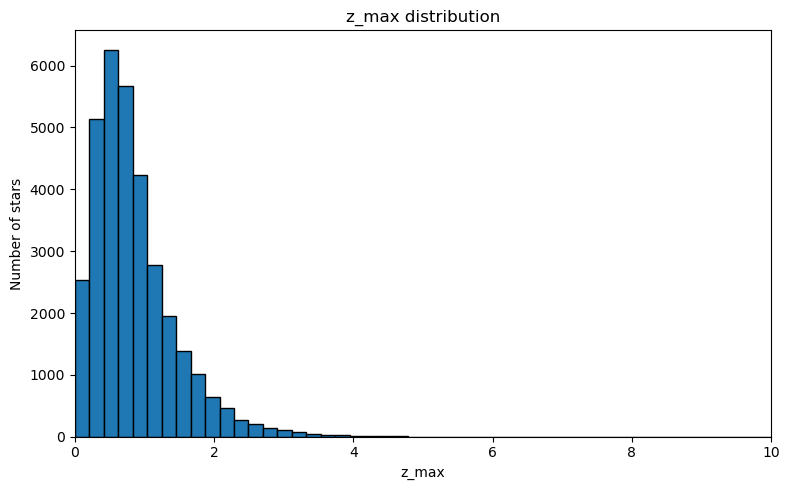

In [48]:
dynamic_check_df = dynamic_check.to_pandas()
col = "z_max"

# convert & filter
vals = pd.to_numeric(dynamic_check_df[col], errors='coerce')      # floats or nan
vals = vals[np.isfinite(vals)]                      # remove nan & inf

#print(len(vals), "finite values")

# sanity check — this should always print False
#print("any infinite left:", np.isinf(vals).any())

plt.figure(figsize=(8,5))
plt.hist(vals, bins=50, edgecolor='black')
plt.xlabel(col)
plt.ylabel("Number of stars")
plt.title(f"{col} distribution")
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

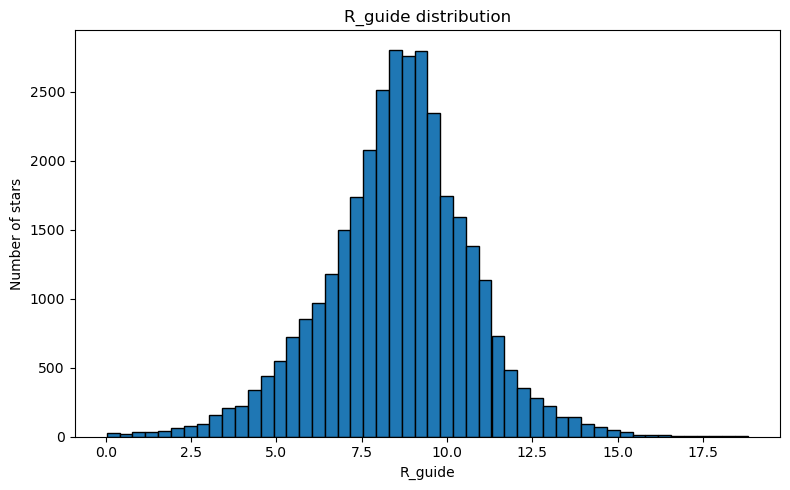

In [93]:
col = "R_guide"

# convert & filter
vals = pd.to_numeric(dynamic_check_df[col], errors='coerce')      # floats or nan
vals = vals[np.isfinite(vals)]                      # remove nan & inf

#print(len(vals), "finite values")

# sanity check — this should always print False
#print("any infinite left:", np.isinf(vals).any())

plt.figure(figsize=(8,5))
plt.hist(vals, bins=50, edgecolor='black')
plt.xlabel(col)
plt.ylabel("Number of stars")
plt.title(f"{col} distribution")
plt.tight_layout()
plt.show()

In [109]:
J_phi_limit = 1700

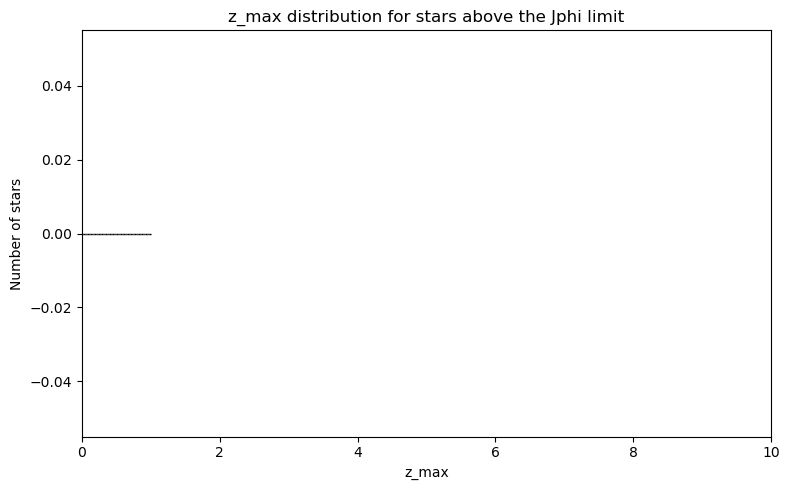

In [117]:
dynamic_check_df = dynamic_check.to_pandas()
col = "z_max"
filter_col = "L_z"  # the thing you want to threshold

limit = J_phi_limit     # whatever threshold you want

# convert both columns to numeric
dynamic_check_df[col]     = pd.to_numeric(dynamic_check_df[col], errors='coerce')
dynamic_check_df[filter_col] = pd.to_numeric(dynamic_check_df[filter_col], errors='coerce')

# filter: keep only rows where L_z is finite AND > limit
mask = (np.isfinite(dynamic_check_df[filter_col])) & (abs(dynamic_check_df[filter_col] > limit))

vals = dynamic_check_df.loc[mask, col]

# remove any bad z values
vals = vals[np.isfinite(vals)]                  # remove nan & inf

#print(len(vals), "finite values")

# sanity check — this should always print False
#print("any infinite left:", np.isinf(vals).any())

plt.figure(figsize=(8,5))
plt.hist(vals, bins=50, edgecolor='black')
plt.xlabel(col)
plt.ylabel("Number of stars")
plt.title(f"{col} distribution for stars above the Jphi limit")
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

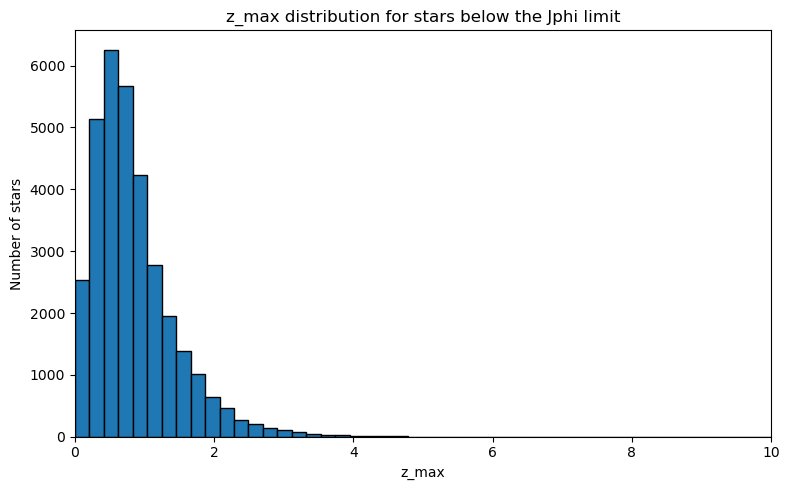

In [119]:
dynamic_check_df = dynamic_check.to_pandas()
col = "z_max"
filter_col = "L_z"  # the thing you want to threshold

limit = J_phi_limit     # whatever threshold you want

# convert both columns to numeric
dynamic_check_df[col]     = pd.to_numeric(dynamic_check_df[col], errors='coerce')
dynamic_check_df[filter_col] = pd.to_numeric(dynamic_check_df[filter_col], errors='coerce')

# filter: keep only rows where L_z is finite AND > limit
mask = (np.isfinite(dynamic_check_df[filter_col])) & (abs(dynamic_check_df[filter_col] < limit))

vals = dynamic_check_df.loc[mask, col]

# remove any bad z values
vals = vals[np.isfinite(vals)]                  # remove nan & inf

#print(len(vals), "finite values")

# sanity check — this should always print False
#print("any infinite left:", np.isinf(vals).any())

plt.figure(figsize=(8,5))
plt.hist(vals, bins=50, edgecolor='black')
plt.xlabel(col)
plt.ylabel("Number of stars")
plt.title(f"{col} distribution for stars below the Jphi limit")
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

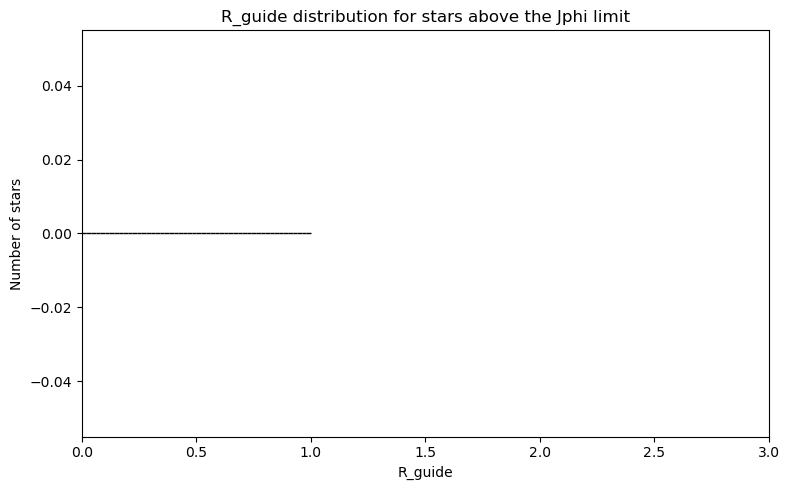

In [121]:
dynamic_check_df = dynamic_check.to_pandas()
col = "R_guide"
filter_col = "L_z"  # the thing you want to threshold

limit = J_phi_limit     # whatever threshold you want

# convert both columns to numeric
dynamic_check_df[col]     = pd.to_numeric(dynamic_check_df[col], errors='coerce')
dynamic_check_df[filter_col] = pd.to_numeric(dynamic_check_df[filter_col], errors='coerce')

# filter: keep only rows where L_z is finite AND > limit
mask = (np.isfinite(dynamic_check_df[filter_col])) & (abs(dynamic_check_df[filter_col] > limit))

vals = dynamic_check_df.loc[mask, col]

# remove any bad z values
vals = vals[np.isfinite(vals)]                  # remove nan & inf

#print(len(vals), "finite values")

# sanity check — this should always print False
#print("any infinite left:", np.isinf(vals).any())

plt.figure(figsize=(8,5))
plt.hist(vals, bins=50, edgecolor='black')
plt.xlabel(col)
plt.ylabel("Number of stars")
plt.title(f"{col} distribution for stars above the Jphi limit")
plt.xlim(0, 3)
plt.tight_layout()
plt.show()

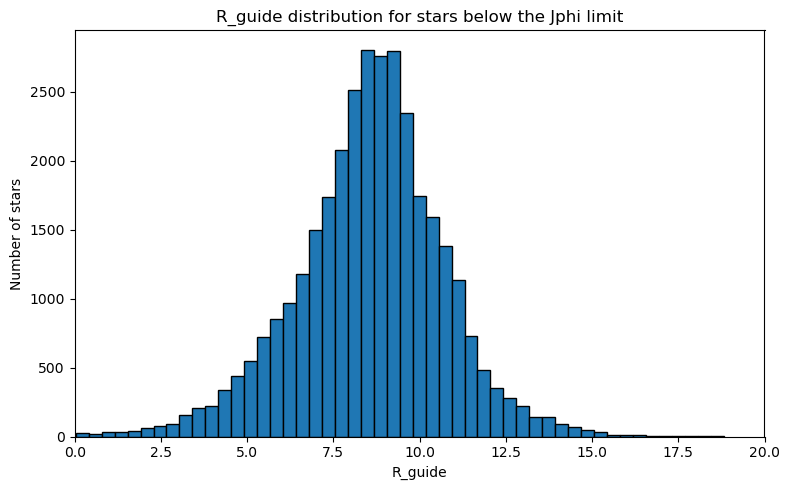

In [123]:
dynamic_check_df = dynamic_check.to_pandas()
col = "R_guide"
filter_col = "L_z"  # the thing you want to threshold

limit = J_phi_limit     # whatever threshold you want

# convert both columns to numeric
dynamic_check_df[col]     = pd.to_numeric(dynamic_check_df[col], errors='coerce')
dynamic_check_df[filter_col] = pd.to_numeric(dynamic_check_df[filter_col], errors='coerce')

# filter: keep only rows where L_z is finite AND > limit
mask = (np.isfinite(dynamic_check_df[filter_col])) & (abs(dynamic_check_df[filter_col] < limit))

vals = dynamic_check_df.loc[mask, col]

# remove any bad z values
vals = vals[np.isfinite(vals)]                  # remove nan & inf

#print(len(vals), "finite values")

# sanity check — this should always print False
#print("any infinite left:", np.isinf(vals).any())

plt.figure(figsize=(8,5))
plt.hist(vals, bins=50, edgecolor='black')
plt.xlabel(col)
plt.ylabel("Number of stars")
plt.title(f"{col} distribution for stars below the Jphi limit")
plt.xlim(0, 20)
plt.tight_layout()
plt.show()

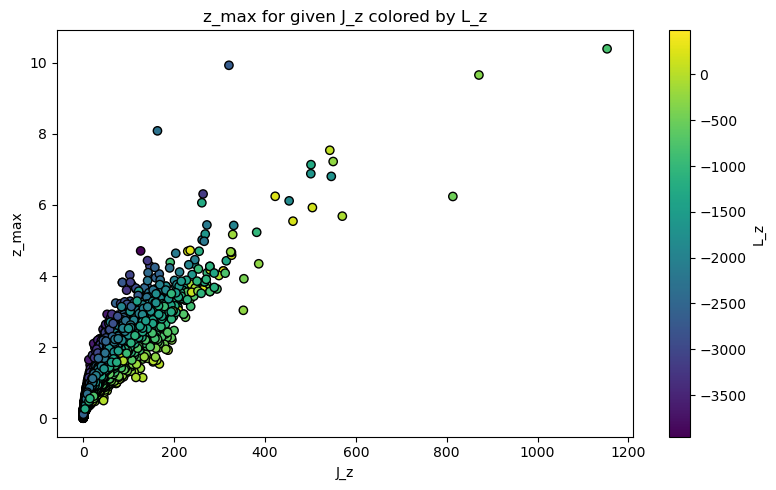

In [52]:
col1= "J_z"
col2= "z_max"
color_col = "L_z"

x = spectroscopy_dynamics_joined[col1]   # this extracts the actual column data
y = spectroscopy_dynamics_joined[col2]
c = spectroscopy_dynamics_joined[color_col]

plt.figure(figsize=(8,5))
sc = plt.scatter(x, y, c=c, cmap="viridis", edgecolor="black")
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f"{col2} for given {col1} colored by {color_col}")
plt.colorbar(sc, label=color_col)
plt.tight_layout()
plt.show()

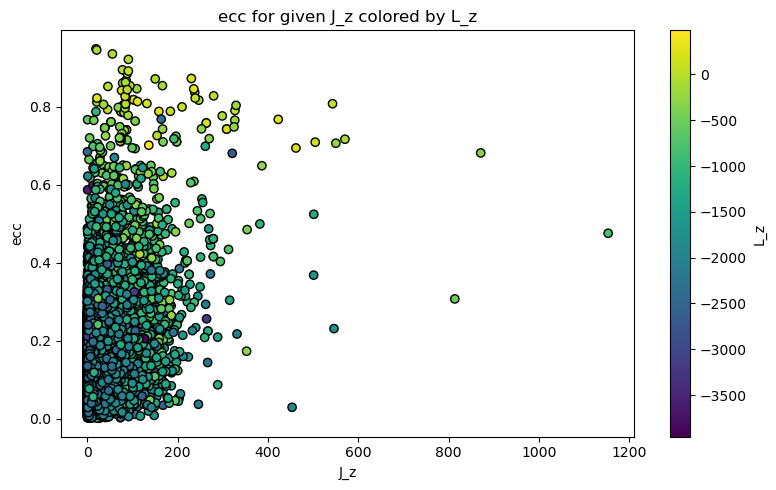

In [54]:
col1= "J_z"
col2= "ecc"
color_col = "L_z"

x = spectroscopy_dynamics_joined[col1]   # this extracts the actual column data
y = spectroscopy_dynamics_joined[col2]
c = spectroscopy_dynamics_joined[color_col]

plt.figure(figsize=(8,5))
sc = plt.scatter(x, y, c=c, cmap="viridis", edgecolor="black")
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f"{col2} for given {col1} colored by {color_col}")
plt.colorbar(sc, label=color_col)
plt.tight_layout()
plt.show()

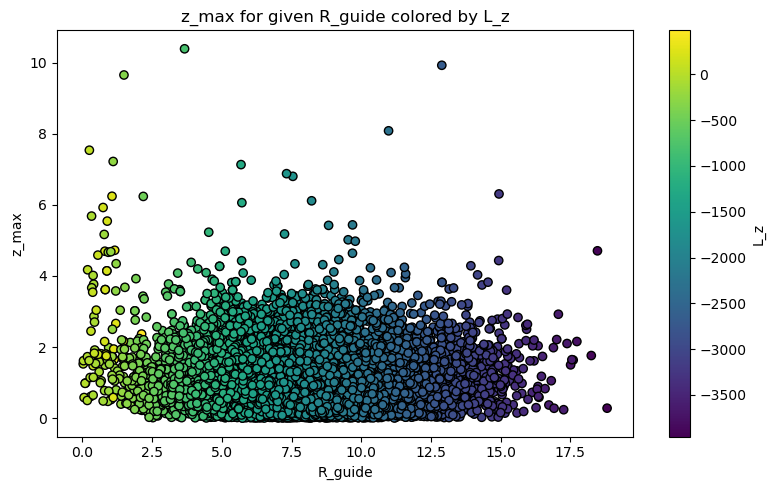

In [56]:
col1= "R_guide"
col2= "z_max"
color_col = "L_z"

x = spectroscopy_dynamics_joined[col1]   # this extracts the actual column data
y = spectroscopy_dynamics_joined[col2]
c = spectroscopy_dynamics_joined[color_col]

plt.figure(figsize=(8,5))
sc = plt.scatter(x, y, c=c, cmap="viridis", edgecolor="black")
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f"{col2} for given {col1} colored by {color_col}")
plt.colorbar(sc, label=color_col)
plt.tight_layout()
plt.show()

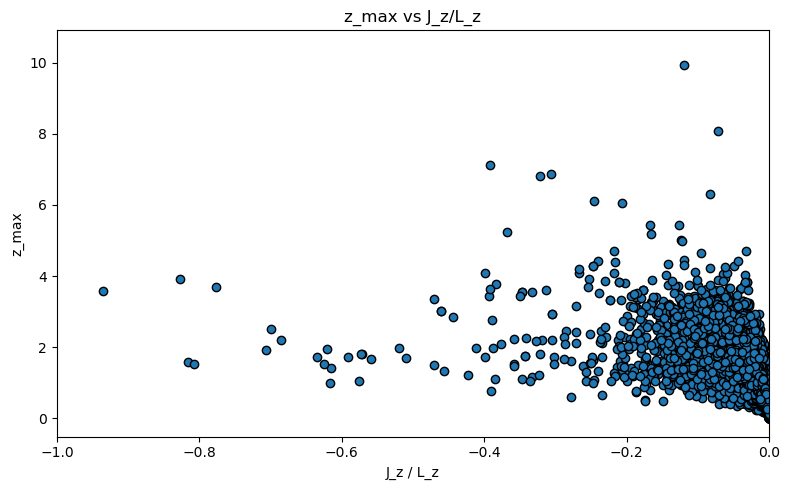

In [70]:
col2 = "z_max"
num = "J_z"        
den = "L_z"       

x = spectroscopy_dynamics_joined[num] / spectroscopy_dynamics_joined[den]      
y = spectroscopy_dynamics_joined[col2]

plt.figure(figsize=(8,5))
sc = plt.scatter(x, y, edgecolor="black")
plt.xlabel(f"{num} / {den}")
plt.ylabel(col2)
plt.xlim(-1,0)
plt.title(f"{col2} vs {num}/{den}")
plt.tight_layout()
plt.show()

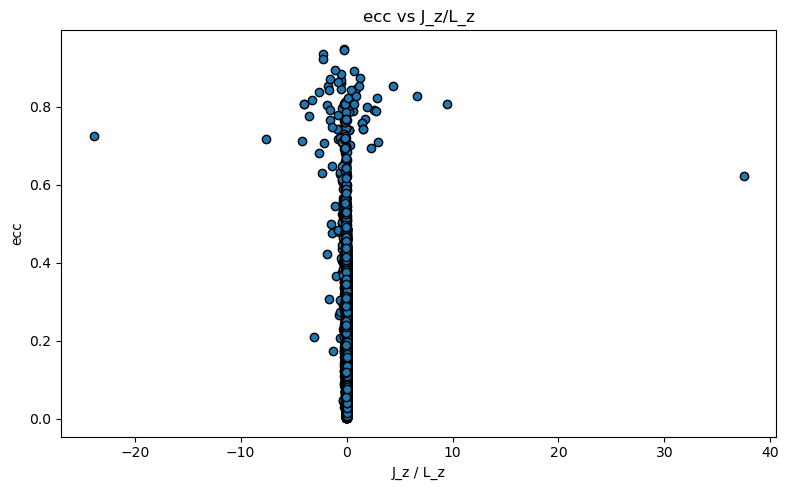

In [64]:
col2 = "ecc"
num = "J_z"        
den = "L_z"       

x = spectroscopy_dynamics_joined[num] / spectroscopy_dynamics_joined[den]      
y = spectroscopy_dynamics_joined[col2]

plt.figure(figsize=(8,5))
sc = plt.scatter(x, y, edgecolor="black")
plt.xlabel(f"{num} / {den}")
plt.ylabel(col2)
plt.title(f"{col2} vs {num}/{den}")
plt.tight_layout()
plt.show()

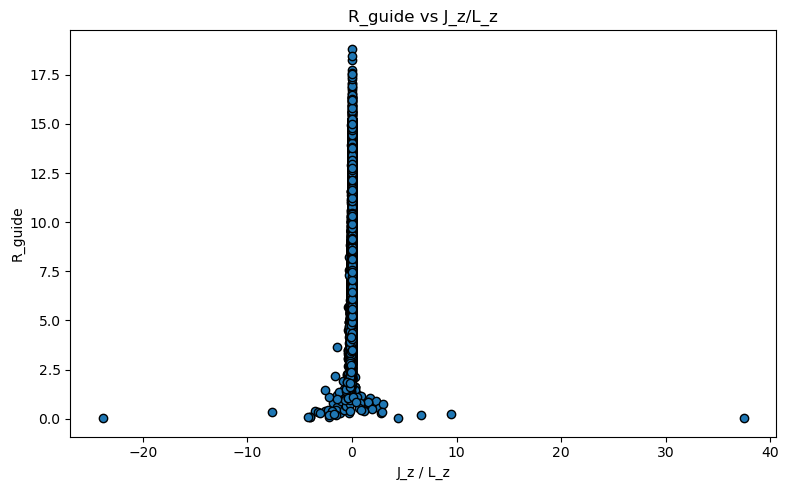

In [66]:
col2 = "R_guide"
num = "J_z"        
den = "L_z"       

x = spectroscopy_dynamics_joined[num] / spectroscopy_dynamics_joined[den]      
y = spectroscopy_dynamics_joined[col2]

plt.figure(figsize=(8,5))
sc = plt.scatter(x, y, edgecolor="black")
plt.xlabel(f"{num} / {den}")
plt.ylabel(col2)
plt.title(f"{col2} vs {num}/{den}")
plt.tight_layout()
plt.show()

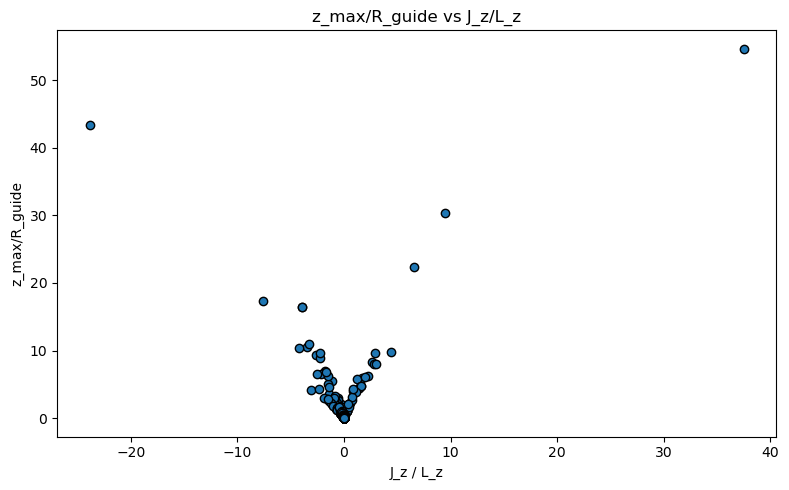

In [68]:
num1 = "J_z"        
den1 = "L_z"       
num2 = "z_max"
den2 = "R_guide"

x = spectroscopy_dynamics_joined[num1] / spectroscopy_dynamics_joined[den1]      
y = spectroscopy_dynamics_joined[num2] / spectroscopy_dynamics_joined[den2]      

plt.figure(figsize=(8,5))
sc = plt.scatter(x, y, edgecolor="black")
plt.xlabel(f"{num1} / {den1}")
plt.ylabel(f"{num2}/{den2}")
plt.title(f"{num2}/{den2} vs {num1}/{den1}")
plt.tight_layout()
plt.show()

#### running HDBSCAN and dynamical spread analysis on different combinations of abundances

In [22]:
apogee_table_chunk_going_into_hdbscan = spectroscopy_dynamics_joined['FE_H','MG_FE','N_FE','C_FE','AL_FE', 'MN_FE', 'CE_FE']
abund_cols = ['FE_H','MG_FE','N_FE','C_FE','AL_FE', 'MN_FE', 'CE_FE'] # creates a list of the columns of abundances that will be used
label_col  = 'HDBSCAN_Cluster' # creates a column for the cluster group 
df = apogee_table_chunk_going_into_hdbscan.to_pandas().astype('float64')  # transforms table of columns that will run through HDBSCAN into a DataFrame

In [24]:
# creates a list of all of the different possible combinations of the seven abundances used
combos = (
    list(itertools.combinations(abund_cols, 2)) +  # all 2‑D combinations
    list(itertools.combinations(abund_cols, 3)) +  # all 3‑D combinations
    list(itertools.combinations(abund_cols, 4)) +  # all 4‑D combinations
    list(itertools.combinations(abund_cols, 5)) +  # all 5‑D combinations
    list(itertools.combinations(abund_cols, 6)) +  # all 6‑D combinations
    list(itertools.combinations(abund_cols, 7))    # all 7‑D combinations
)

In [26]:
mcs = 3 #this is what a previous paper suggested
maxcs = 1222 # arbitrary
cse = 0.02

In [28]:
clusterers = {}  # creates a dictionary to hold each fitted HDBSCAN model 
cluster_labels_dict = {}  # creates a dictrionary to hold all new columns
spread_cols = ['E', 'R_guide', 'ecc', 'z_max', 'J_R', 'J_z', 'L_z', 'L_x', 'L_y'] # creates a list of the columns that will be used to calculate spread
spread_results = {} # creates a dictionary to hold the calculated results of the spreads

df_abund = apogee_table_chunk_going_into_hdbscan.to_pandas().astype('float64') # abundance DataFrame (used for clustering)

# dynamical DataFrame (used for spread analysis)
df_dyn = pd.DataFrame(
    {col: np.asarray(spectroscopy_dynamics_joined[col], dtype='float64') # turns each column into a numpy array and assigns each array to its corresponding key
     for col in spread_cols}, # loops through each column in spread_cols  
    index=np.arange(len(spectroscopy_dynamics_joined)) # ensures that the DataFrame has the same length as the astropy table
)
df_dyn['APOGEE_ID'] = spectroscopy_dynamics_joined['APOGEE_ID'] # adds a column to the DataaFrame for apogee id


for combo in combos: # loops over each tuple of abundances
    tag = '|'.join(combo) # joins the different abundances into a name with abundances seperated by |
    features = df_abund[list(combo)].to_numpy() # pulls only the relevent columns from df and turns it into a numpy array
    hdb = HDBSCAN(min_cluster_size=mcs, cluster_selection_epsilon = cse, max_cluster_size= maxcs) # configures a new HDBSCAN instance
    hdb.fit(features) # runs HDBSCAN
    labels = hdb.labels_.astype(int) 
    clusterers[tag] = hdb # saves the fitted model into the clusterers dictionary
    cluster_labels_dict[f'cluster_{tag}'] = labels # stores labels in the column dictionary
    dyn_tmp = df_dyn.copy() # compute average cluster size
    dyn_tmp['HDBSCAN_Cluster'] = labels # Merge cluster labels with dynamical data
    dyn_good = dyn_tmp[~dyn_tmp['HDBSCAN_Cluster'].isin([-1, -3])] # remove noise and outliers
    spread = dyn_good.groupby('HDBSCAN_Cluster')[spread_cols].std() # compute spread within each cluster
    spread_results[tag] = spread.mean()  # average spread per dynamical variable
cluster_df = pd.DataFrame(cluster_labels_dict, index=df.index) # creates a dataframe with every key in cluster_labels_dict as a column and the same index as df
df = pd.concat([df, cluster_df], axis=1) # attaches all new cluster columns to the main DataFrame
spread_summary = pd.DataFrame(spread_results).T  # rows = tags, cols = variables
spread_summary.reset_index(inplace=True)
spread_summary.rename(columns={'index': 'combo_tag'}, inplace=True)
spread_table = Table.from_pandas(spread_summary)

In [29]:
cluster_counts = {} # creates an empty dictionary that will map combo tag to the number of clusters

for tag in clusterers.keys(): # iterates over every abundance combo
    col = f'cluster_{tag}' # builds the dataframe column name
    unique_labels = pd.unique(df[col].values.ravel()) # grabs all the distinct label values that represent seperate clusters in that column 
    n_clusters = len(unique_labels[unique_labels >= 0])  # ignores all the values that are negative (-1 is noise)
    cluster_counts[tag] = n_clusters # saves the count of clusters to a dictionary

print("Clusters found per combo:")
for tag, n in cluster_counts.items(): # iterates over the dictionary
    print(f"{tag:<30}  {n:3d}") # prints the tags is a readable format (left aligns the tag in a 30 character field and shows the number of clusters as a three digit integer)

Clusters found per combo:
FE_H|MG_FE                        3
FE_H|N_FE                        19
FE_H|C_FE                        21
FE_H|AL_FE                        5
FE_H|MN_FE                        3
FE_H|CE_FE                       69
MG_FE|N_FE                       14
MG_FE|C_FE                       11
MG_FE|AL_FE                       4
MG_FE|MN_FE                       2
MG_FE|CE_FE                      29
N_FE|C_FE                        14
N_FE|AL_FE                       12
N_FE|MN_FE                        8
N_FE|CE_FE                       48
C_FE|AL_FE                       18
C_FE|MN_FE                        8
C_FE|CE_FE                       43
AL_FE|MN_FE                       4
AL_FE|CE_FE                      38
MN_FE|CE_FE                      28
FE_H|MG_FE|N_FE                 109
FE_H|MG_FE|C_FE                  48
FE_H|MG_FE|AL_FE                 29
FE_H|MG_FE|MN_FE                 12
FE_H|MG_FE|CE_FE                152
FE_H|N_FE|C_FE                  134
FE

In [30]:
tags    = list(cluster_counts.keys())          # abundance‑combo strings
n_clust = [cluster_counts[t] for t in tags]    # corresponding counts

results_tbl = Table(
    [tags, n_clust],
    names=('combo_tag', 'n_clusters')
)

In [31]:
results_tbl 
results_tbl.write('results_table_apogeeRC.ecsv', format='ascii.ecsv', overwrite=True)

In [38]:
average_cluster_sizes = {}  # combo tag → average size
outlier_counts = {}

for tag, hdb in clusterers.items():
    labels = hdb.labels_  # get cluster labels for this combo
    n_outlier = sum(labels == -1) # counts number of outliers 
    outlier_counts[tag] = n_outlier # stores the outlier count for a particular combination of abundances in a dictionary
    labels_cleaned = labels[labels != -1] # filters out noise 
    cluster_count = pd.Series(labels_cleaned).value_counts() # counts the number of stars in each cluster
    avg_size = cluster_count.mean() # computes the average number of stars in each cluster
    average_cluster_sizes[tag] = avg_size # stores the average cluster size for a particular combination of abundances in a dictionary

# convert to a table
combo_tags = list(average_cluster_sizes.keys())
avg_sizes = list(average_cluster_sizes.values())
outlier_number = list(outlier_counts.values())

# creates pandas DataFrame
avg_size_outlier_df = pd.DataFrame({
    'Abundance_Combination': combo_tags,
    'Average_Cluster_Size': avg_sizes,
    'Number_Outliers': outlier_number
})
# converts to Astropy Table
avg_size_outlier_table = Table.from_pandas(avg_size_outlier_df)

In [40]:
avg_size_outlier_table.pprint(max_lines=-1)

        Abundance_Combination          Average_Cluster_Size Number_Outliers
-------------------------------------- -------------------- ---------------
                            FE_H|MG_FE              10991.0              32
                             FE_H|N_FE   1732.3157894736842              91
                             FE_H|C_FE   1567.5238095238096              87
                            FE_H|AL_FE               6588.6              62
                            FE_H|MN_FE   10988.666666666666              39
                            FE_H|CE_FE    468.8857142857143             183
                            MG_FE|N_FE   2353.3571428571427              58
                            MG_FE|C_FE    2996.181818181818              47
                           MG_FE|AL_FE               8247.5              15
                           MG_FE|MN_FE              16481.0              43
                           MG_FE|CE_FE   1095.6666666666667             135
            

In [42]:
avg_size_outlier_table
avg_size_outlier_table.write('avg_size_outlier_table_apogeeRC.ecsv', format='ascii.ecsv', overwrite=True)

In [44]:
spread_table # prints the spread data as an astropy table
spread_table.write('spread_table_apogeeRC.ecsv', format='ascii.ecsv', overwrite=True)

#### plot of results

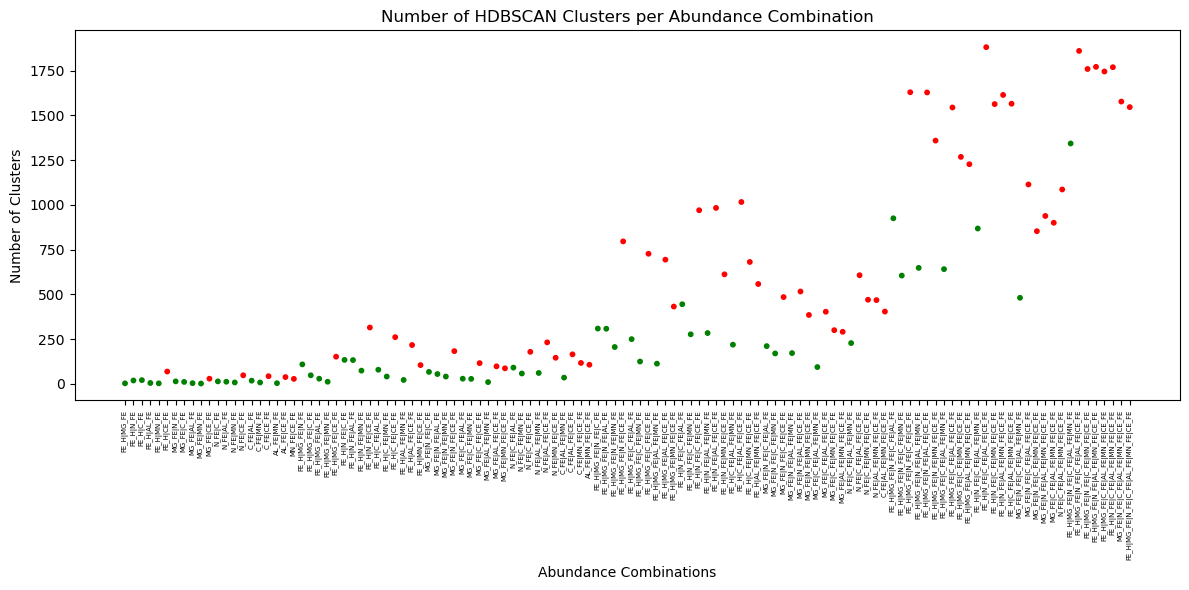

In [84]:
import matplotlib.pyplot as plt

x_labels = list(cluster_counts.keys()) # assigns the names of combinations of abundances as the x-axis
y_values = list(cluster_counts.values()) # assigns the number of clusters as the y-axis

point_colors = ['red' if 'CE_FE' in tag else 'green' for tag in x_labels] # color list so the dot is red if 'CE_FE' in tag, else green

# creates the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x_labels, y_values, color=point_colors, s=10)

plt.xticks(rotation=90, fontsize=5) # improves readability of long x-axis labels by rotating 90 degrees and shrinking font size
plt.xlabel("Abundance Combinations")
plt.ylabel("Number of Clusters")
plt.title("Number of HDBSCAN Clusters per Abundance Combination")
plt.tight_layout()

plt.show()


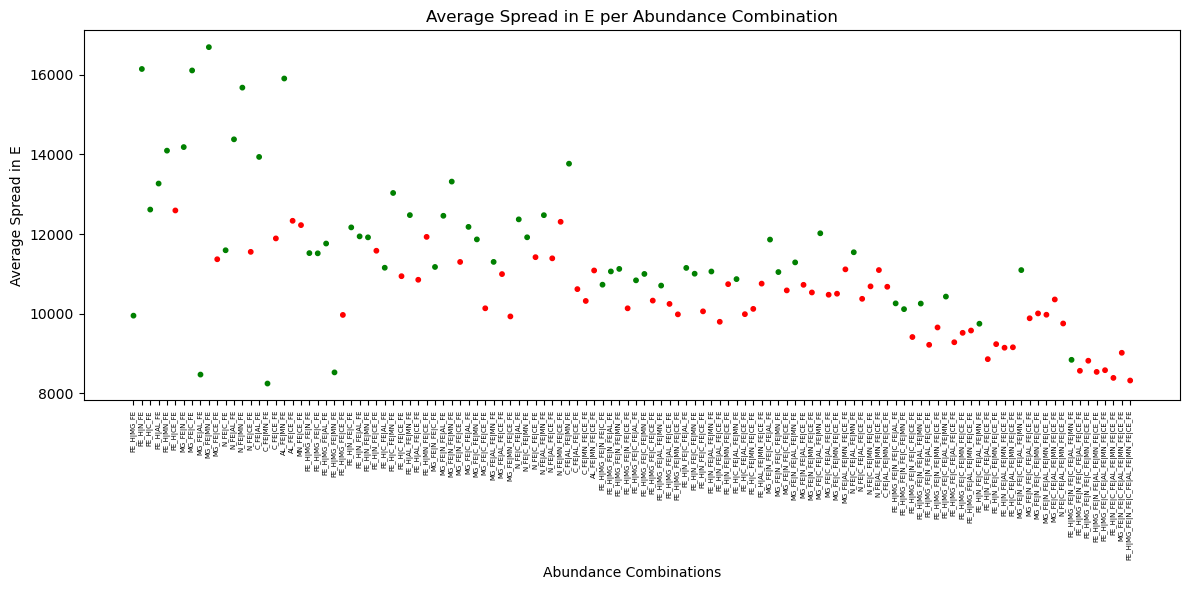

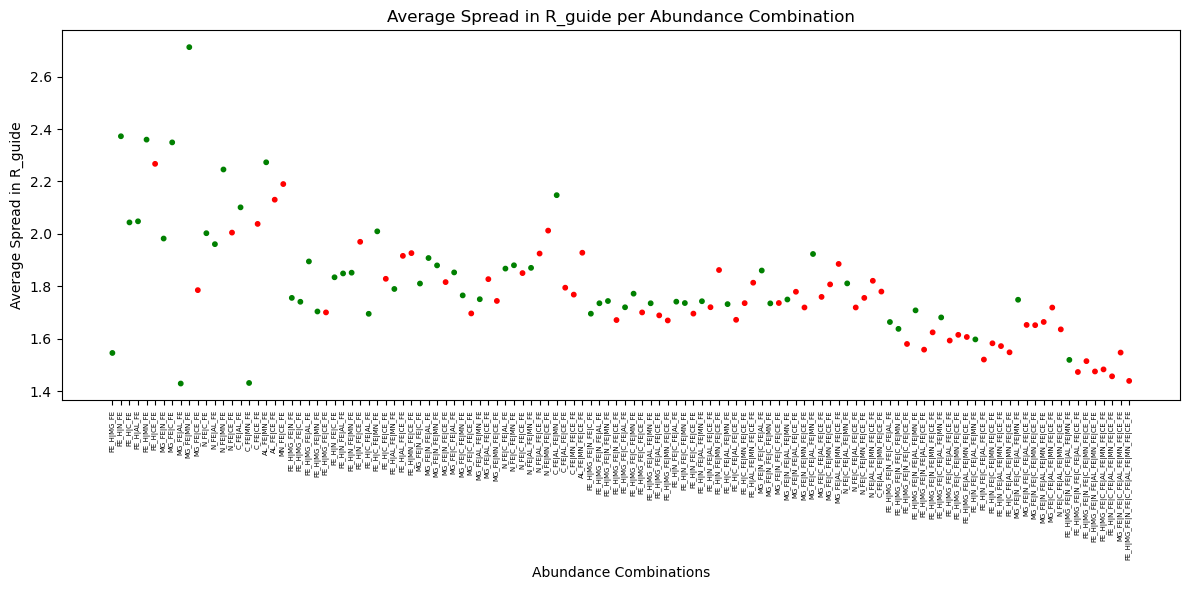

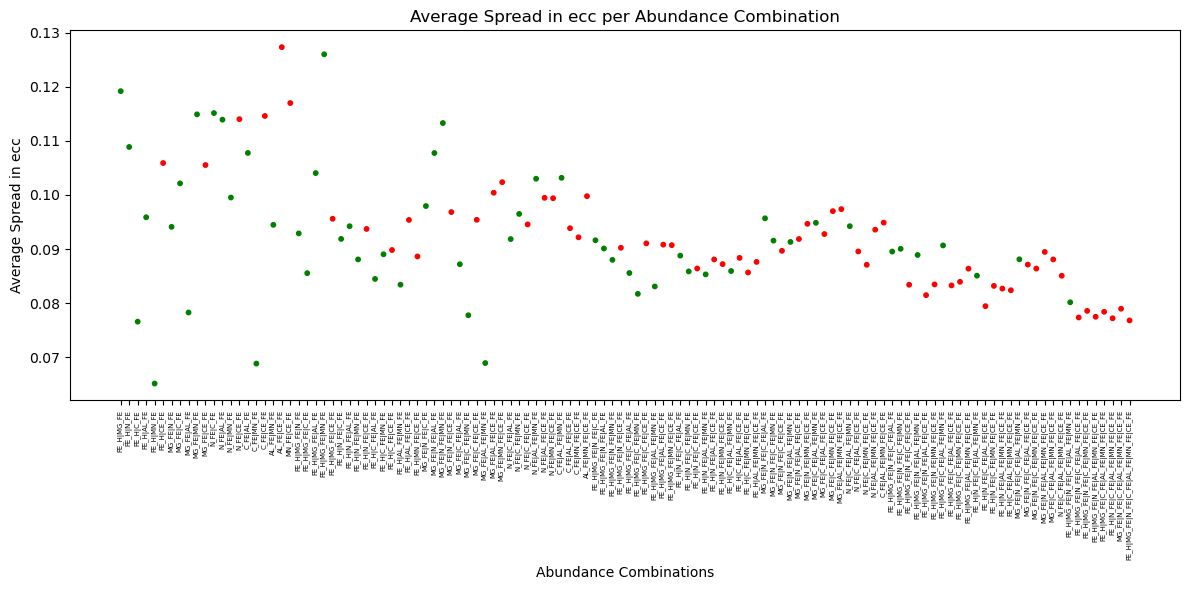

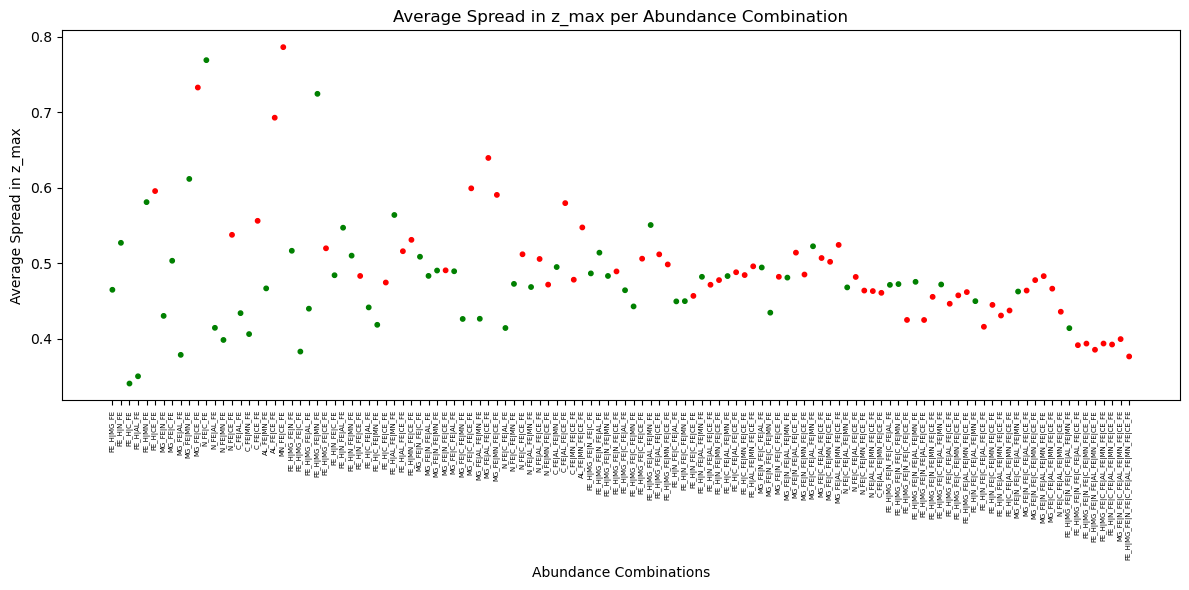

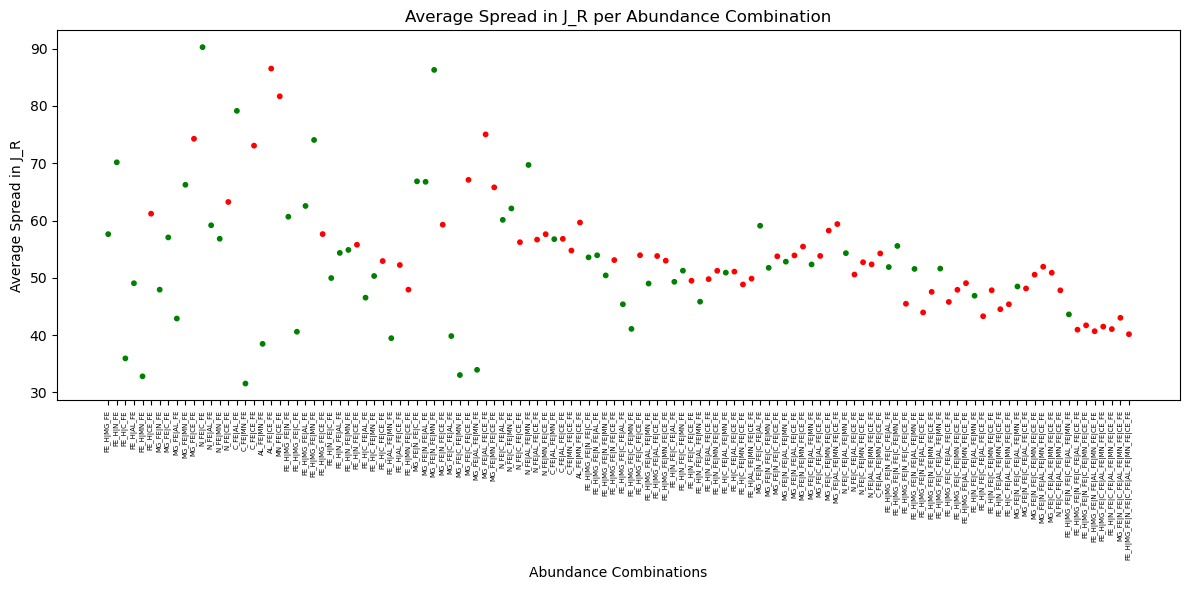

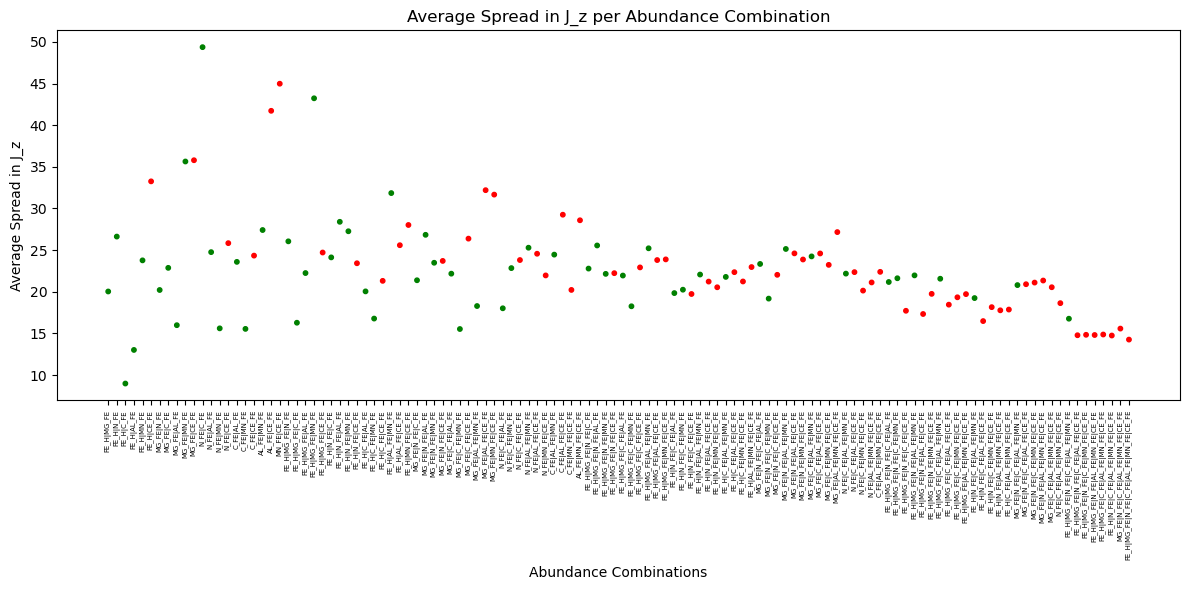

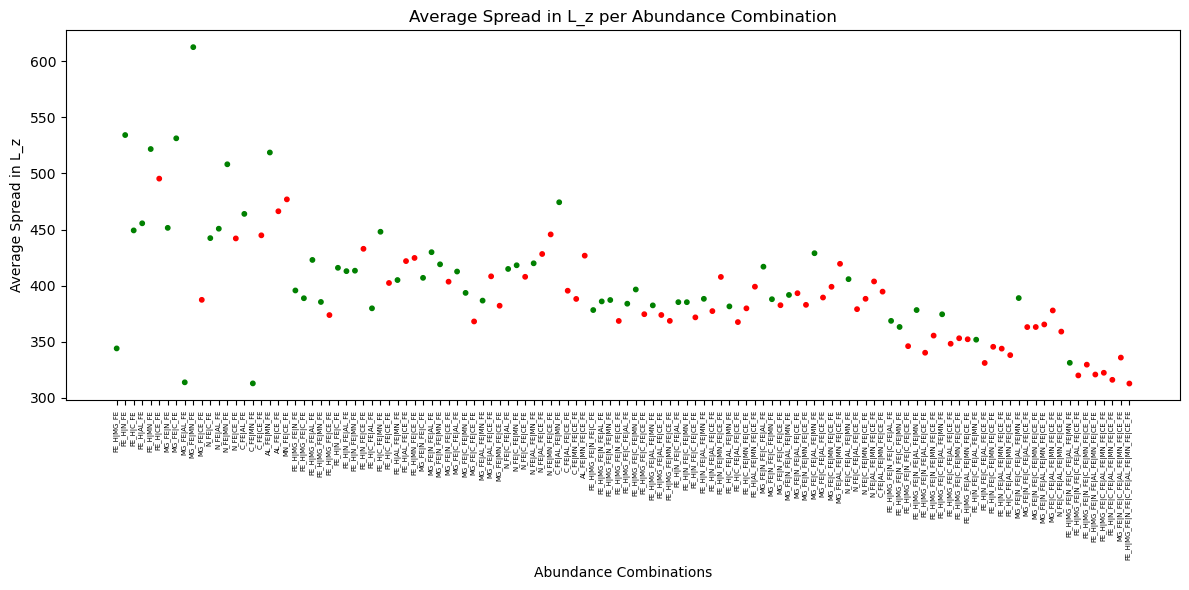

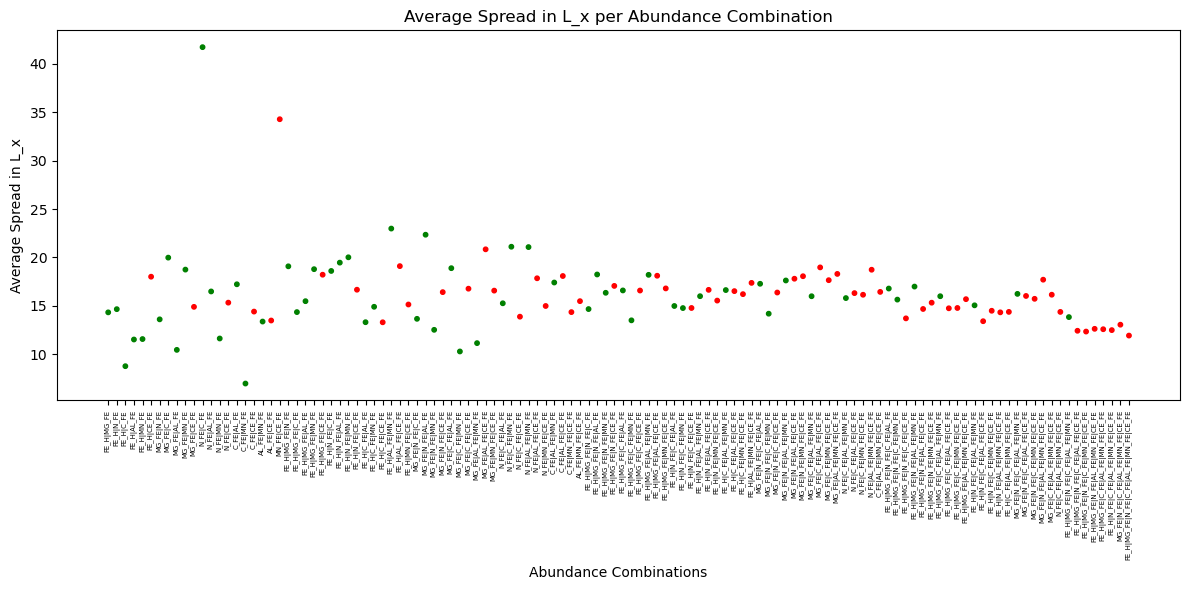

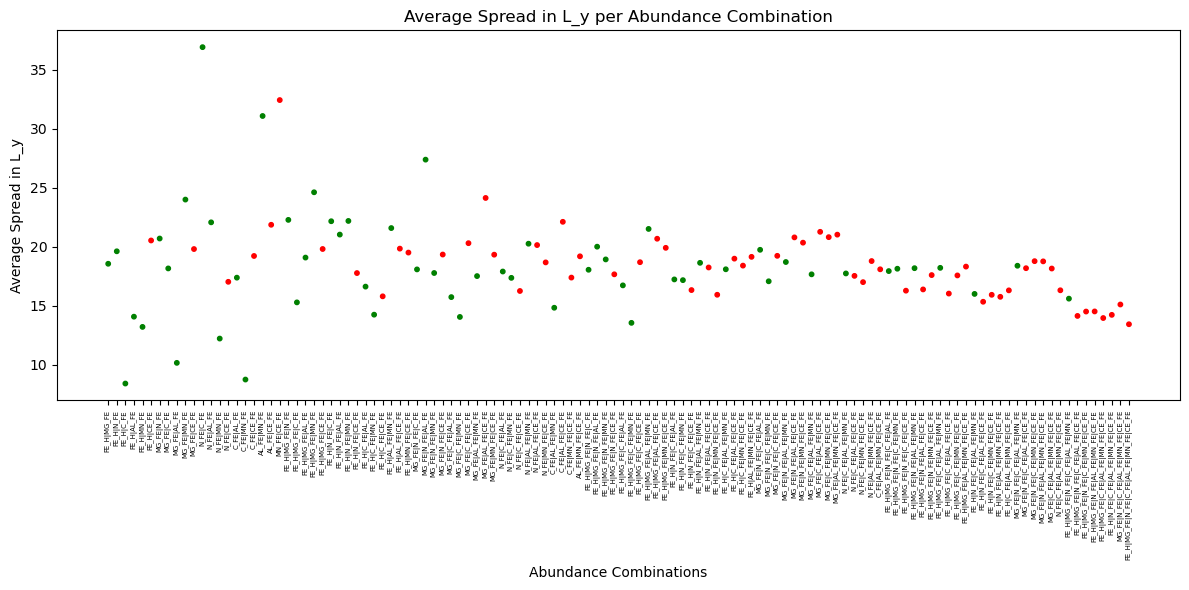

In [86]:
for col in spread_summary.columns:
    if col == 'combo_tag':  # avoid printing a plot with combo tag vs. combo tag
        continue  # skip this column
    plt.figure(figsize=(12, 6))
    x_labels = spread_summary['combo_tag'].tolist() # adds ea
    y_values = spread_summary[col].values

    point_colors = ['red' if 'CE_FE' in str(tag) else 'green' for tag in x_labels]
    
    plt.scatter(x_labels, y_values, color=point_colors, s=10)
    plt.xticks(rotation=90, fontsize=5)
    plt.xlabel("Abundance Combinations")
    plt.ylabel(f"Average Spread in {col}")
    plt.title(f"Average Spread in {col} per Abundance Combination")
    plt.tight_layout()
    plt.show()

In [294]:
print(repr(spread_summary.columns.tolist()))

['combo_tag', 'E', 'R_guide', 'ecc', 'z_max', 'J_R', 'J_z', 'L_z', 'L_x', 'L_y']


#### finding the fit for the results

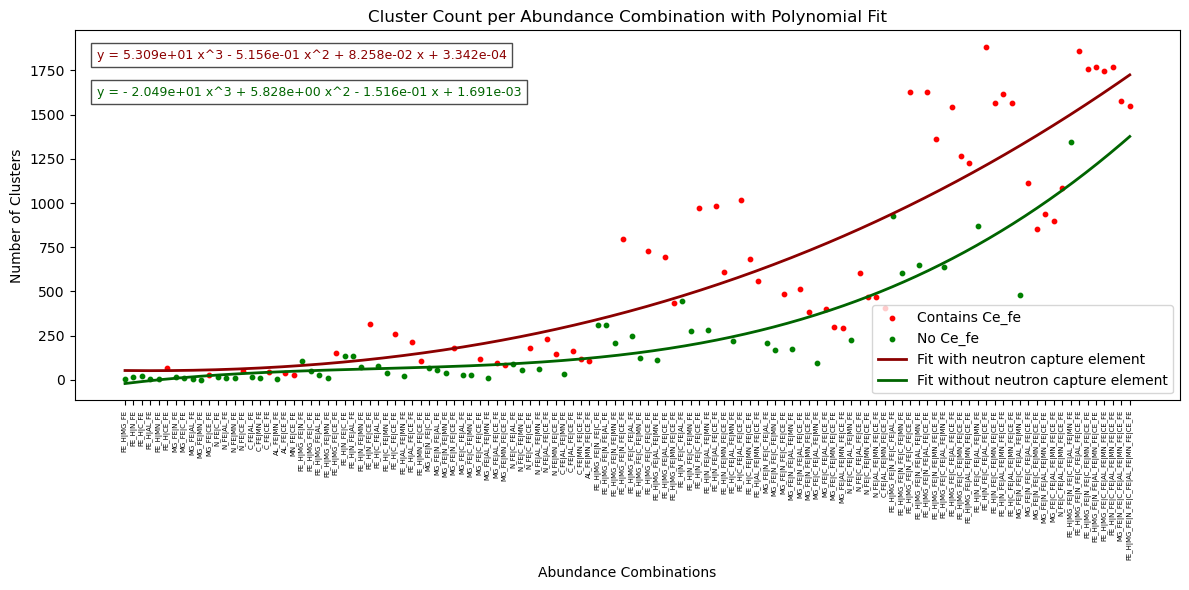

In [48]:
# First, tries a polynomial fit
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

# Converts x_labels to numeric indices
x_labels = list(cluster_counts.keys()) # assigns the names of combinations of abundances as the x-axis
x_numeric = np.arange(len(x_labels))
y_values = np.array(list(cluster_counts.values()))

# Splits data by color
red_x, red_y = [],[]
green_x, green_y = [],[]

for i, tag in enumerate(x_labels):
    if 'CE_FE' in tag:
        red_x.append(x_numeric[i])
        red_y.append(y_values[i])
    else:
        green_x.append(x_numeric[i])
        green_y.append(y_values[i])

# Fits 3rd-degree polynomial
red_poly = Polynomial.fit(red_x, red_y, deg=3)
green_poly = Polynomial.fit(green_x, green_y, deg=3)

# Evaluates fits on smoother x-values
x_fit = np.linspace(0, len(x_labels) - 1, 500)
red_fit_y = red_poly(x_fit)
green_fit_y = green_poly(x_fit)

# Extracts polynomial coefficients in standard form for equation display
red_coefs = red_poly.convert().coef
green_coefs = green_poly.convert().coef

def format_poly_eq(coefs):
    terms = []
    degree = len(coefs) - 1
    for i, c in enumerate(coefs):
        power = degree - i
        if abs(c) < 1e-12:
            continue
        sign = '+' if c > 0 else '-'
        c_abs = abs(c)
        if power == 0:
            term = f"{c_abs:.3e}"
        elif power == 1:
            term = f"{c_abs:.3e} x"
        else:
            term = f"{c_abs:.3e} x^{power}"
        terms.append(f" {sign} {term}")
    eq = ''.join(terms)
    # Fix leading plus sign:
    if eq.startswith(' +'):
        eq = eq[2:]
    return "y =" + eq

red_eq = format_poly_eq(red_coefs)
green_eq = format_poly_eq(green_coefs)

# Plots
plt.figure(figsize=(12, 6))
plt.scatter(red_x, red_y, color='red', s=10, label='Contains Ce_fe')
plt.scatter(green_x, green_y, color='green', s=10, label='No Ce_fe')
plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Fit with neutron capture element')
plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Fit without neutron capture element')
plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)
plt.xlabel("Abundance Combinations")
plt.ylabel("Number of Clusters")
plt.title("Cluster Count per Abundance Combination with Polynomial Fit")
plt.legend(loc='lower right')

# Adds equation texts to the plot (top-left)
plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=9,
         color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=9,
         color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

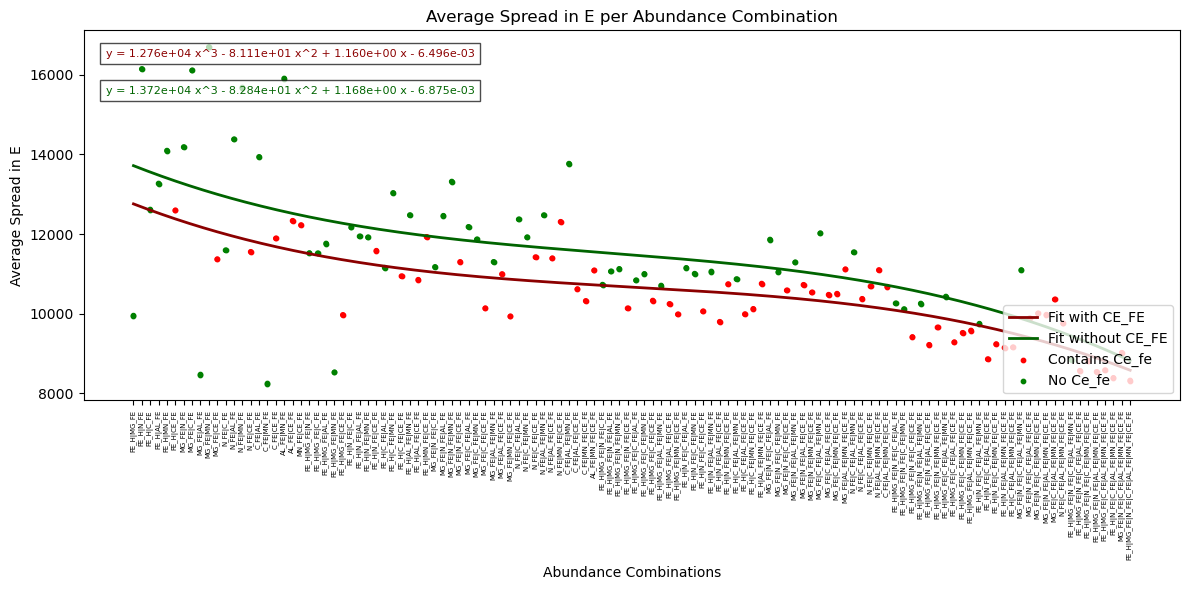

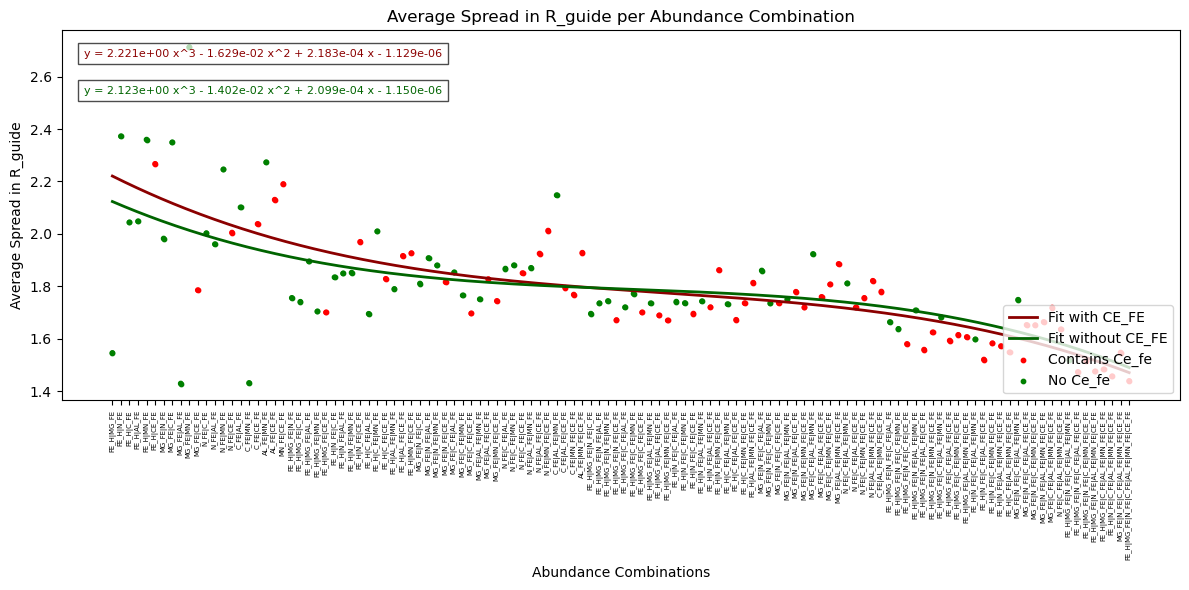

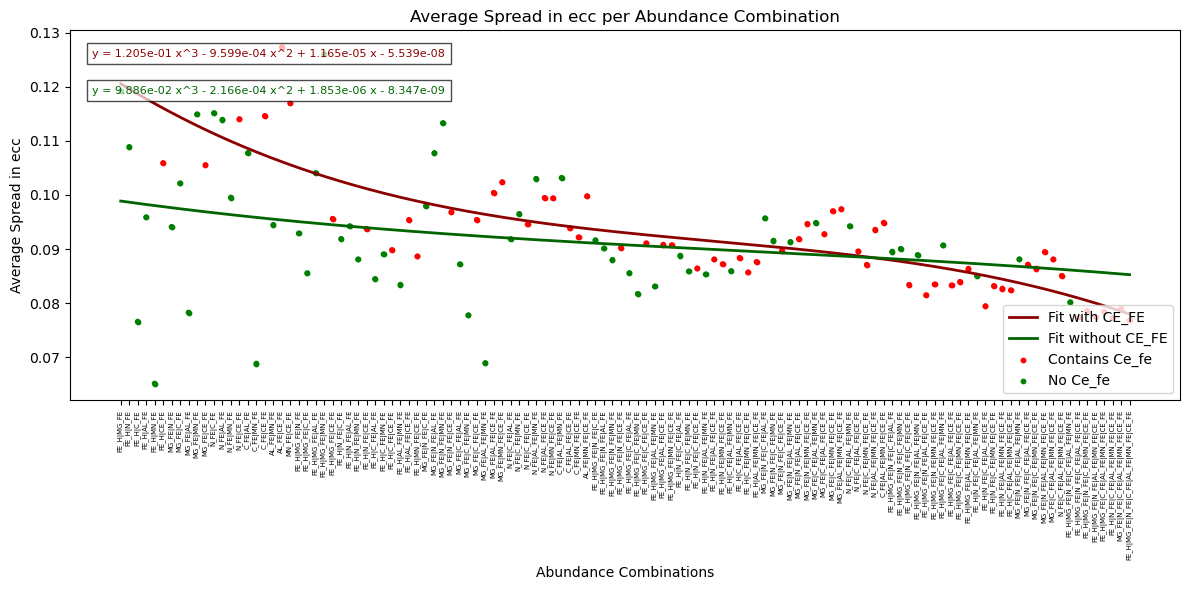

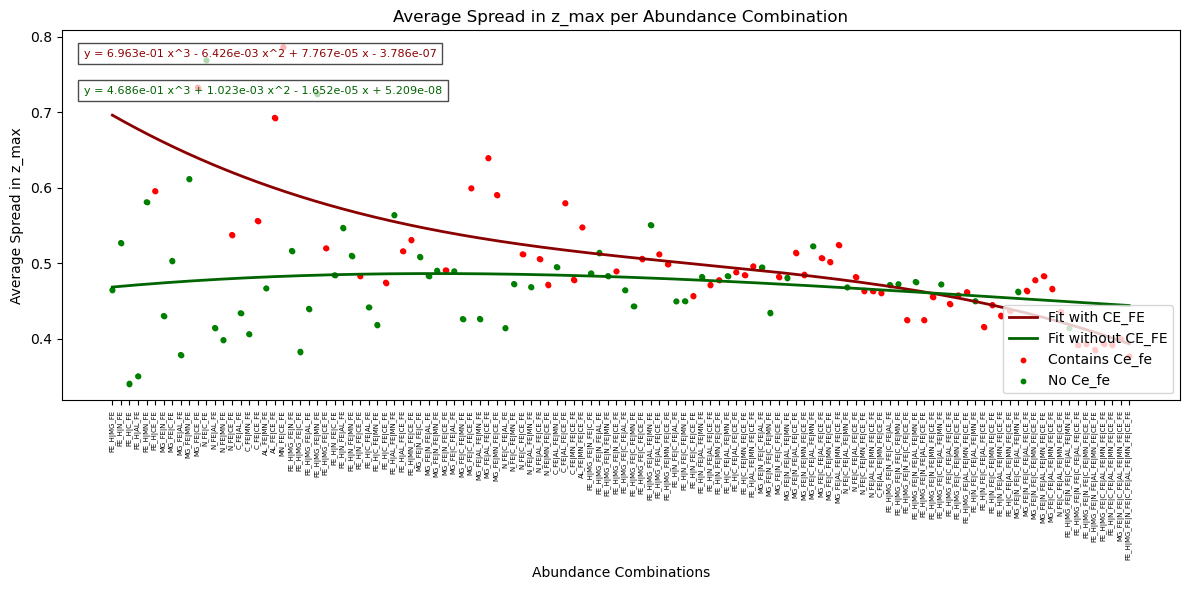

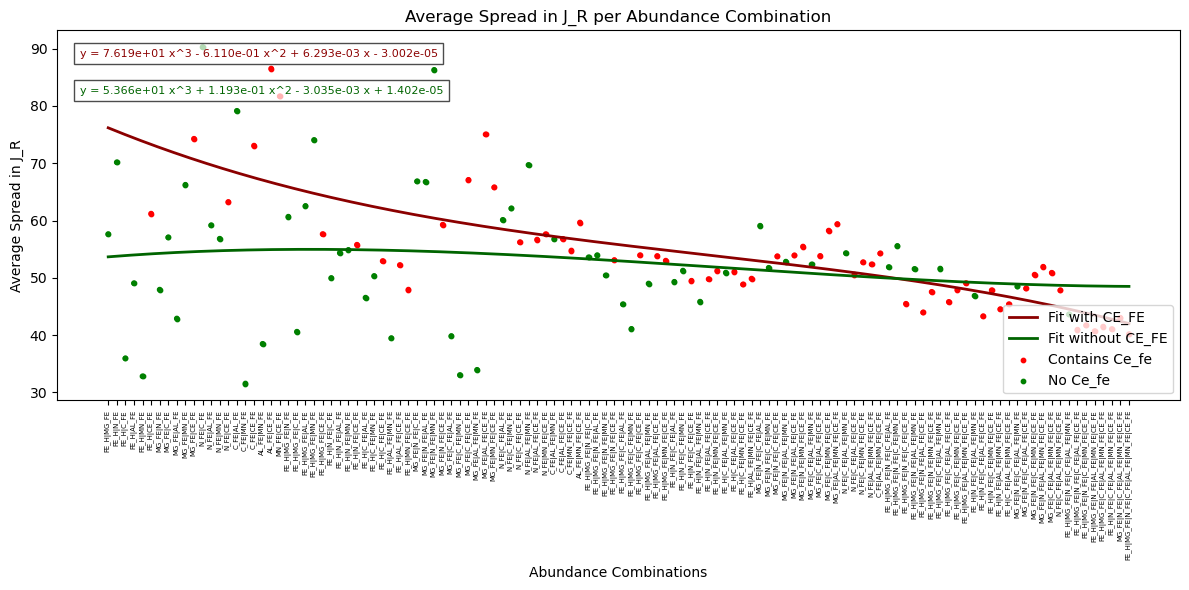

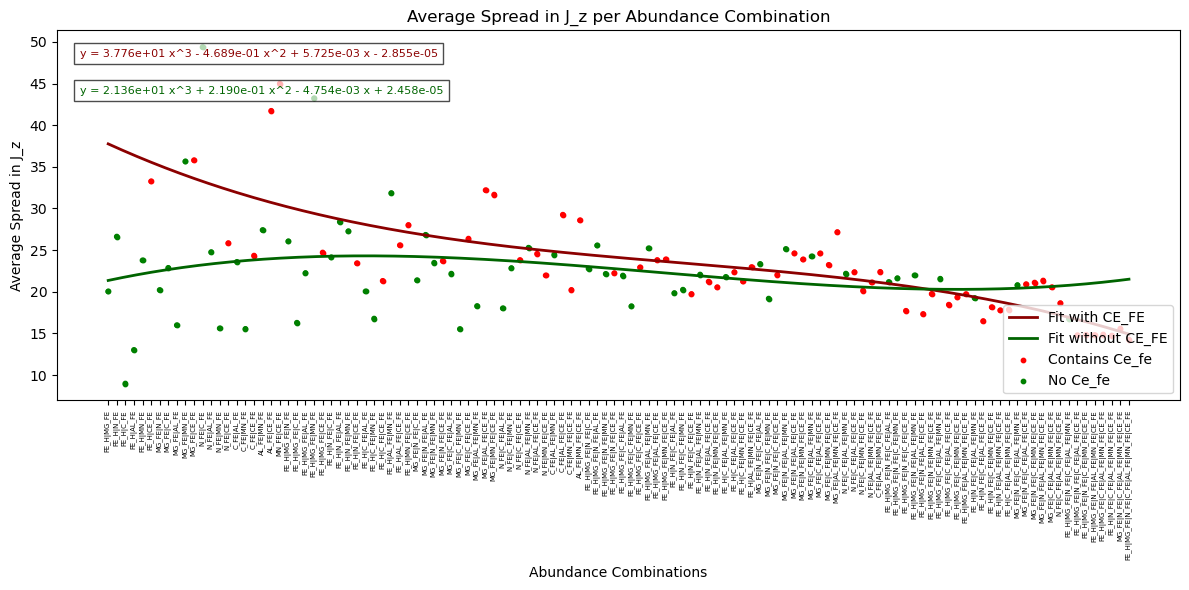

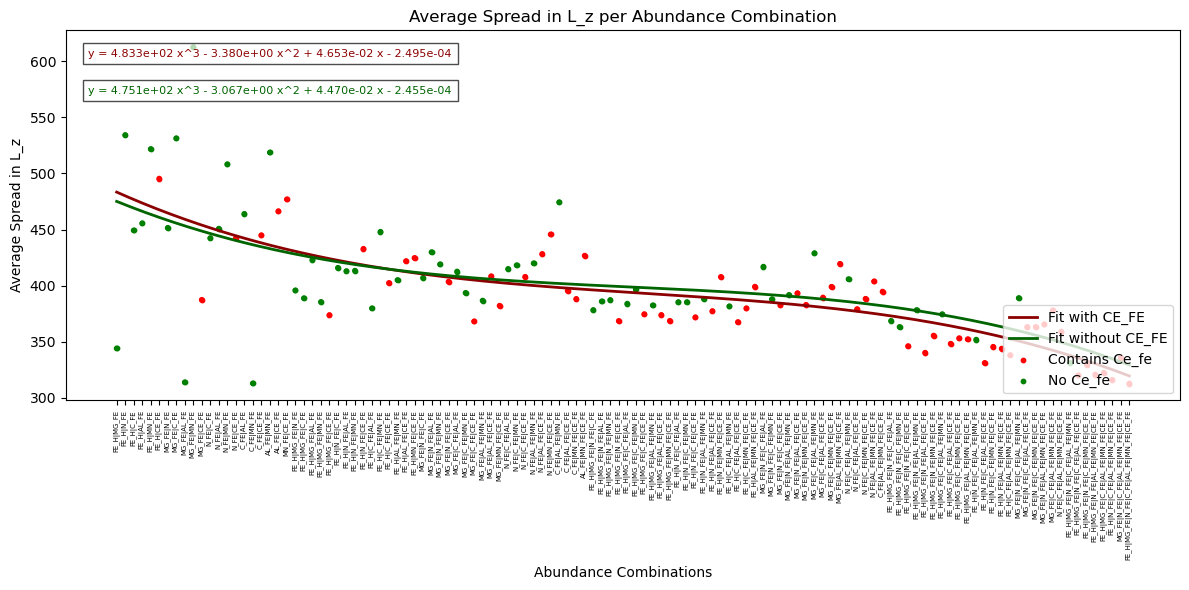

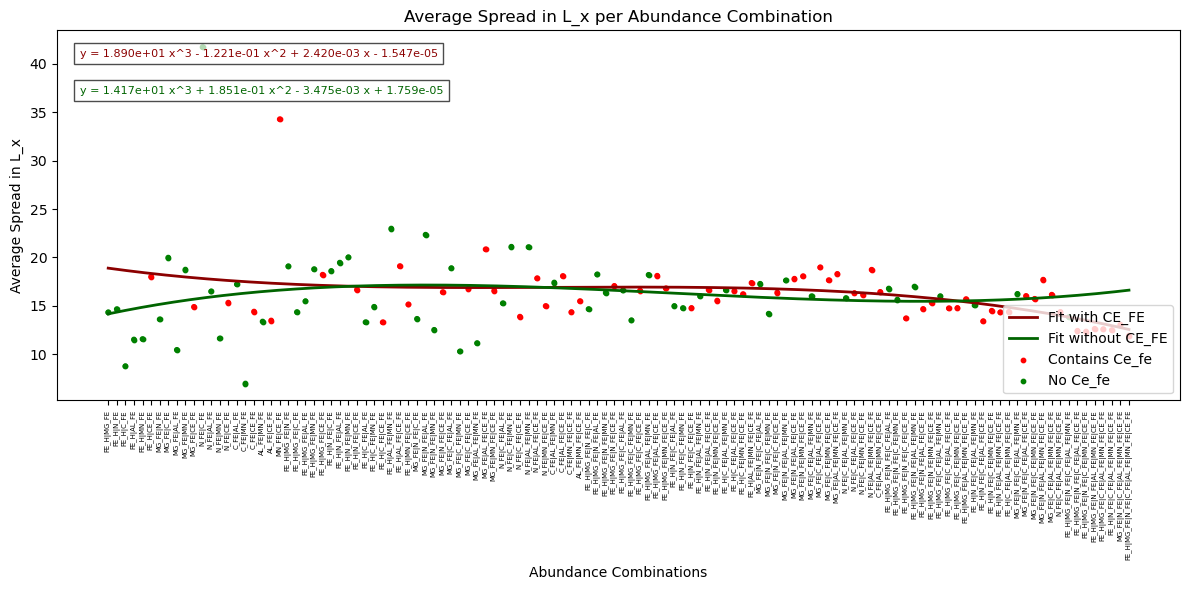

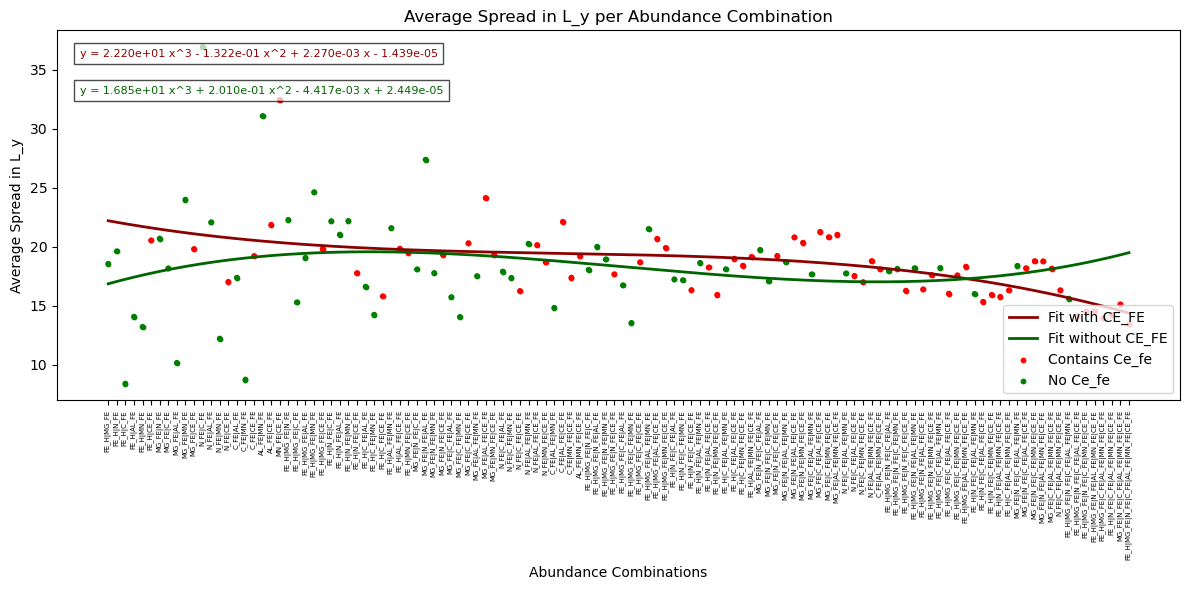

In [74]:
# Adjusted polynomial fit code to work for the loop of dynamical properties
for col in spread_summary.columns:
    if col == 'combo_tag':
        continue  # skip combo_tag column

    plt.figure(figsize=(12, 6))
    
    x_labels = spread_summary['combo_tag'].tolist()
    y_values = spread_summary[col].values

    x_numeric = np.arange(len(x_labels))

    # Split data by color
    red_x, red_y = [], []
    green_x, green_y = [], []

    for i, tag in enumerate(x_labels):
        if 'CE_FE' in str(tag):
            red_x.append(x_numeric[i])
            red_y.append(y_values[i])
        else:
            green_x.append(x_numeric[i])
            green_y.append(y_values[i])

    # Fits 3rd-degree polynomial where data exists
    red_poly = None
    green_poly = None
    if len(red_x) >= 4:
        red_poly = Polynomial.fit(red_x, red_y, deg=3)
    if len(green_x) >= 4:
        green_poly = Polynomial.fit(green_x, green_y, deg=3)

    x_fit = np.linspace(0, len(x_labels) - 1, 500)

    # Evaluates polynomial fits
    red_fit_y = red_poly(x_fit) if red_poly else None
    green_fit_y = green_poly(x_fit) if green_poly else None

    # Prepares polynomial equations for display
    def format_poly_eq(coefs):
        terms = []
        degree = len(coefs) - 1
        for i, c in enumerate(coefs):
            power = degree - i
            if abs(c) < 1e-12:
                continue
            sign = '+' if c > 0 else '-'
            c_abs = abs(c)
            if power == 0:
                term = f"{c_abs:.3e}"
            elif power == 1:
                term = f"{c_abs:.3e} x"
            else:
                term = f"{c_abs:.3e} x^{power}"
            terms.append(f" {sign} {term}")
        eq = ''.join(terms)
        if eq.startswith(' +'):
            eq = eq[2:]
        return "y =" + eq

    red_eq = format_poly_eq(red_poly.convert().coef) if red_poly else "Not enough red points to fit"
    green_eq = format_poly_eq(green_poly.convert().coef) if green_poly else "Not enough green points to fit"

    # Scatter plots
    point_colors = ['red' if 'CE_FE' in str(tag) else 'green' for tag in x_labels]
    plt.scatter(x_numeric, y_values, color=point_colors, s=10)

    # Plots polynomial fits
    if red_fit_y is not None:
        plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Fit with CE_FE')
    if green_fit_y is not None:
        plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Fit without CE_FE')

    plt.scatter(red_x, red_y, color='red', s=10, label='Contains Ce_fe')
    plt.scatter(green_x, green_y, color='green', s=10, label='No Ce_fe')
   
    # Sets x-axis labels
    plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)

    plt.xlabel("Abundance Combinations")
    plt.ylabel(f"Average Spread in {col}")
    plt.title(f"Average Spread in {col} per Abundance Combination")
    plt.legend(loc='lower right')

    # Adds equation text in upper left, separated vertically
    plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=8,
             color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=8,
             color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    plt.tight_layout()
    plt.show()

Average percent difference between fits: 102.41%


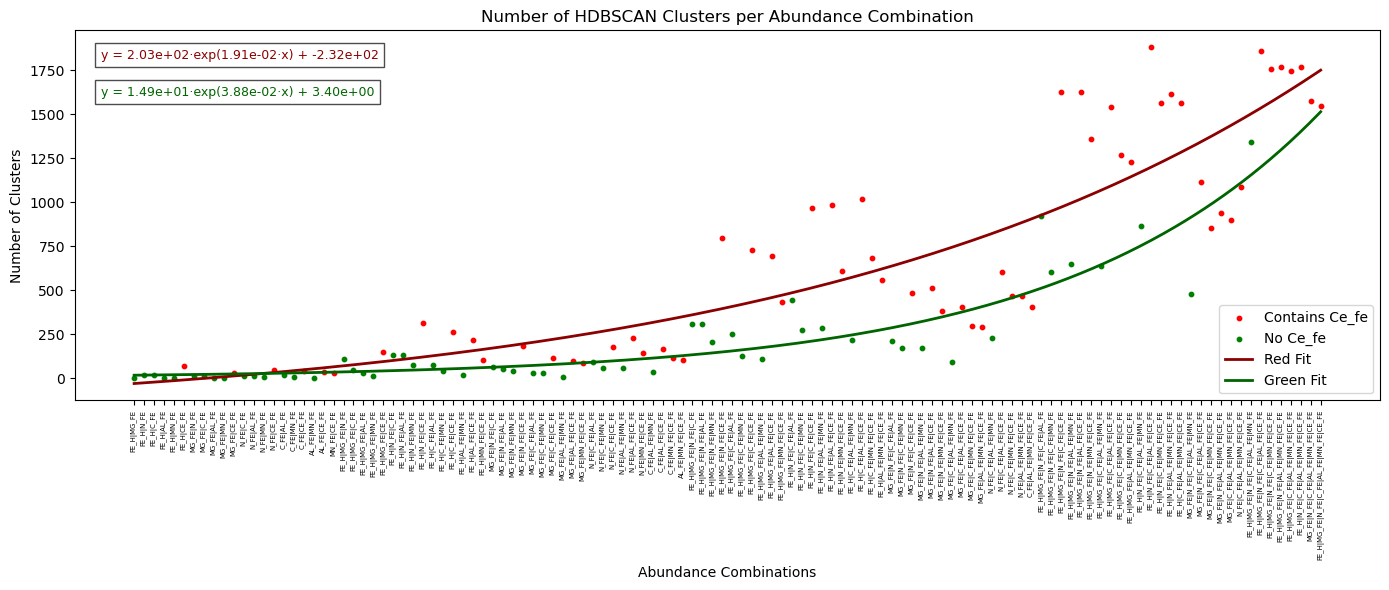

In [85]:
# Next tries exponential fit
from scipy.optimize import curve_fit

# Defines exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Prepares data
x_labels = list(cluster_counts.keys())
y_values = list(cluster_counts.values())
x_numeric = np.arange(len(x_labels))  # numeric x for fitting
y_values = np.array(y_values)

# Splits by CE_FE
red_x, red_y = [], []
green_x, green_y = [], []

for i, tag in enumerate(x_labels):
    if 'CE_FE' in tag:
        red_x.append(x_numeric[i])
        red_y.append(y_values[i])
    else:
        green_x.append(x_numeric[i])
        green_y.append(y_values[i])

# Fits exponential model
x_fit = np.linspace(0, len(x_labels)-1, 500)

if len(red_x) >= 3:
    popt_red, _ = curve_fit(exp_func, red_x, red_y, p0=(1, 1e-6, 1), maxfev=10000)
    red_fit_y = exp_func(x_fit, *popt_red)
    red_eq = f"y = {popt_red[0]:.2e}·exp({popt_red[1]:.2e}·x) + {popt_red[2]:.2e}"

if len(green_x) >= 3:
    popt_green, _ = curve_fit(exp_func, green_x, green_y, p0=(1, 1e-6, 1), maxfev=10000)
    green_fit_y = exp_func(x_fit, *popt_green)
    green_eq = f"y = {popt_green[0]:.2e}·exp({popt_green[1]:.2e}·x) + {popt_green[2]:.2e}"

# Percent difference calculation
if popt_red is not None and popt_green is not None:
    # Calculates percent difference across the same x_fit range
    y_red = exp_func(x_fit, *popt_red)
    y_green = exp_func(x_fit, *popt_green)

percent_diff = (y_green - y_red) / y_red * 100  # relative to red
avg_percent_diff = np.mean(np.abs(percent_diff))
print(f"Average percent difference between fits: {avg_percent_diff:.2f}%")
    
    
# Creates the scatter plot
plt.figure(figsize=(14, 6))
point_colors = ['red' if 'CE_FE' in tag else 'green' for tag in x_labels]
plt.scatter(red_x, red_y, color='red', s=10, label='Contains Ce_fe')
plt.scatter(green_x, green_y, color='green', s=10, label='No Ce_fe')

# Plots fits
plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Red Fit')
plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=9,
             color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Green Fit')
plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=9,
             color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Formats x-axis with original labels
plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)
plt.xlabel("Abundance Combinations")
plt.ylabel("Number of Clusters")
plt.title("Number of HDBSCAN Clusters per Abundance Combination")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Average percent difference between fits: 7.61%


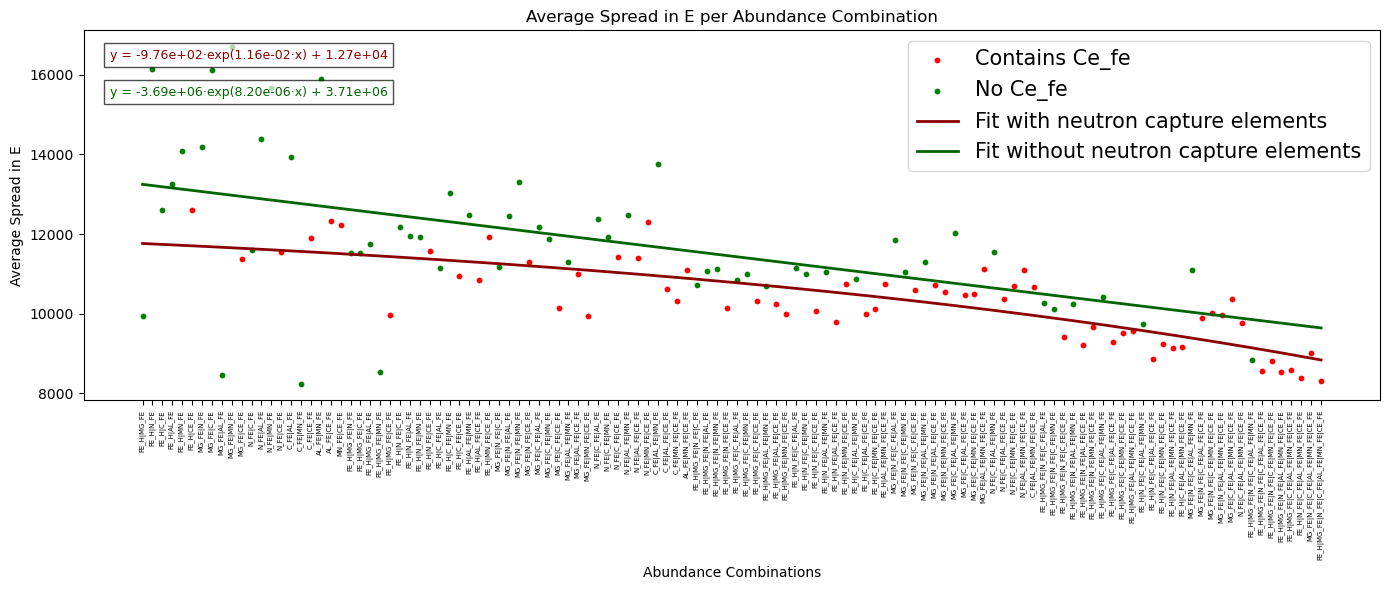

Average percent difference between fits: 2.73%


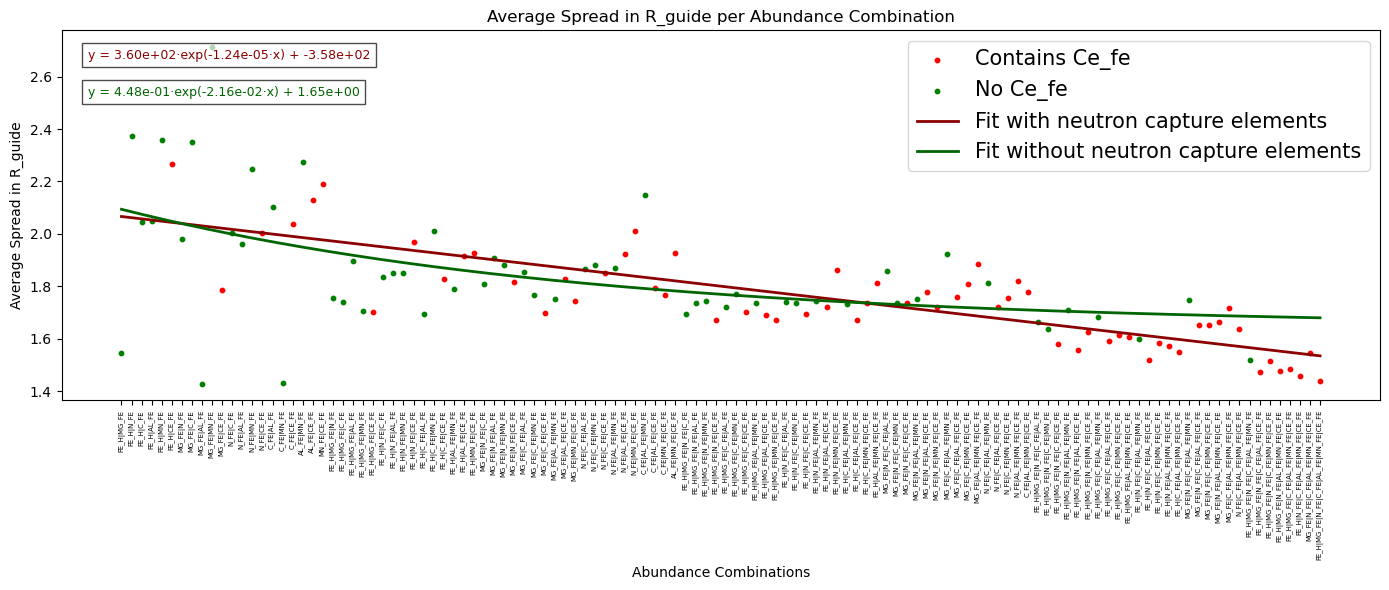

Average percent difference between fits: 5.53%


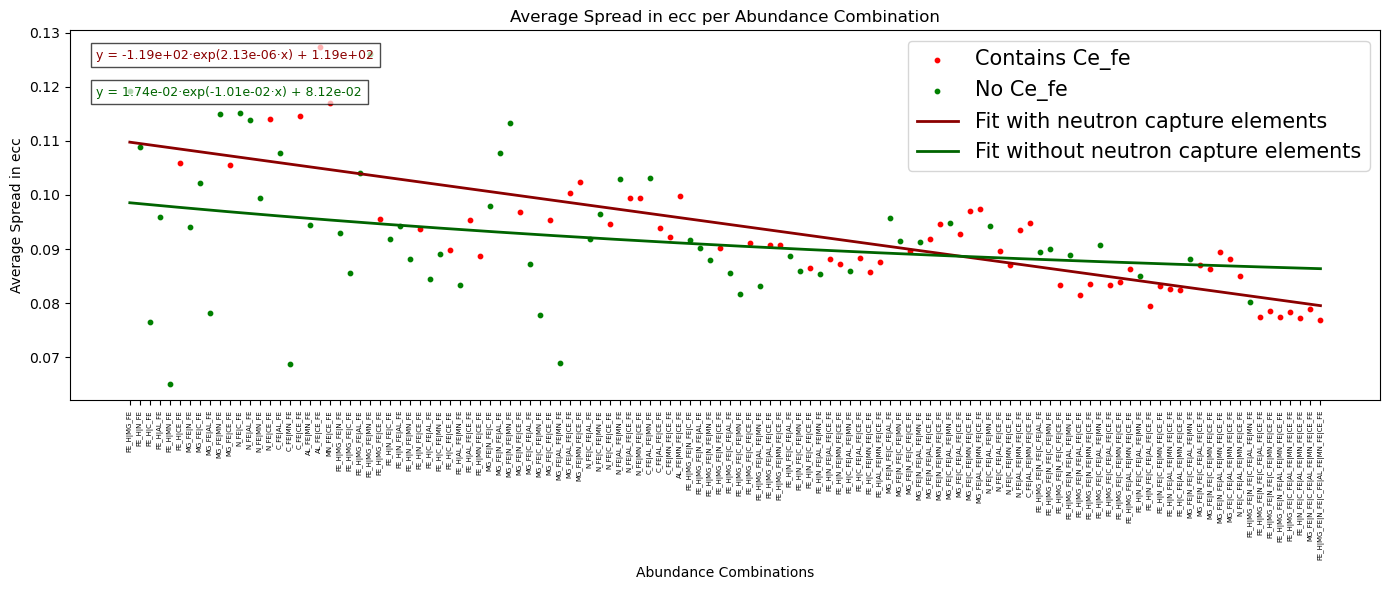

Average percent difference between fits: 10.99%


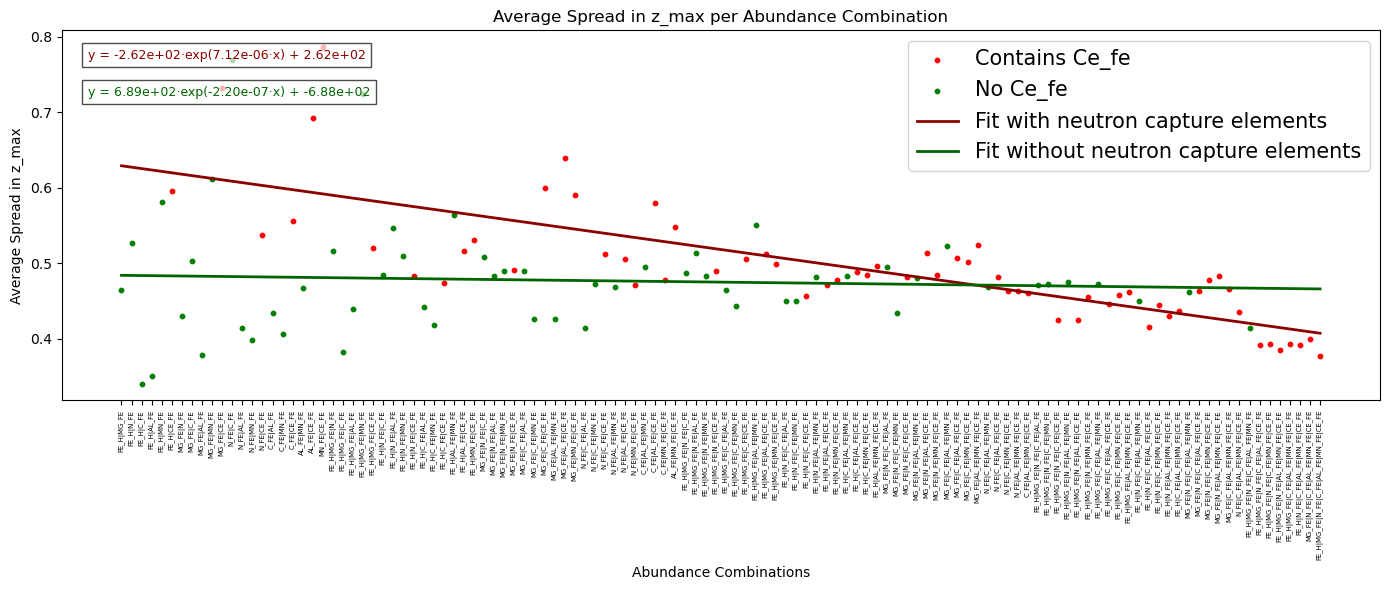

Average percent difference between fits: 8.78%


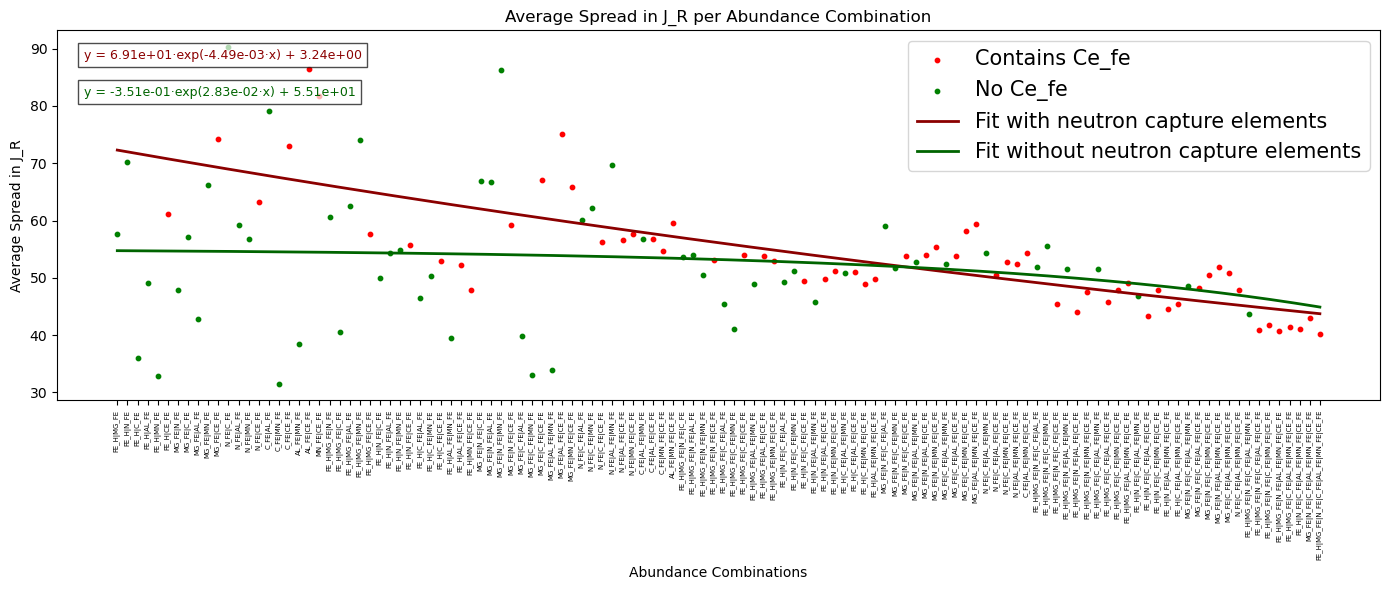

Average percent difference between fits: 14.65%


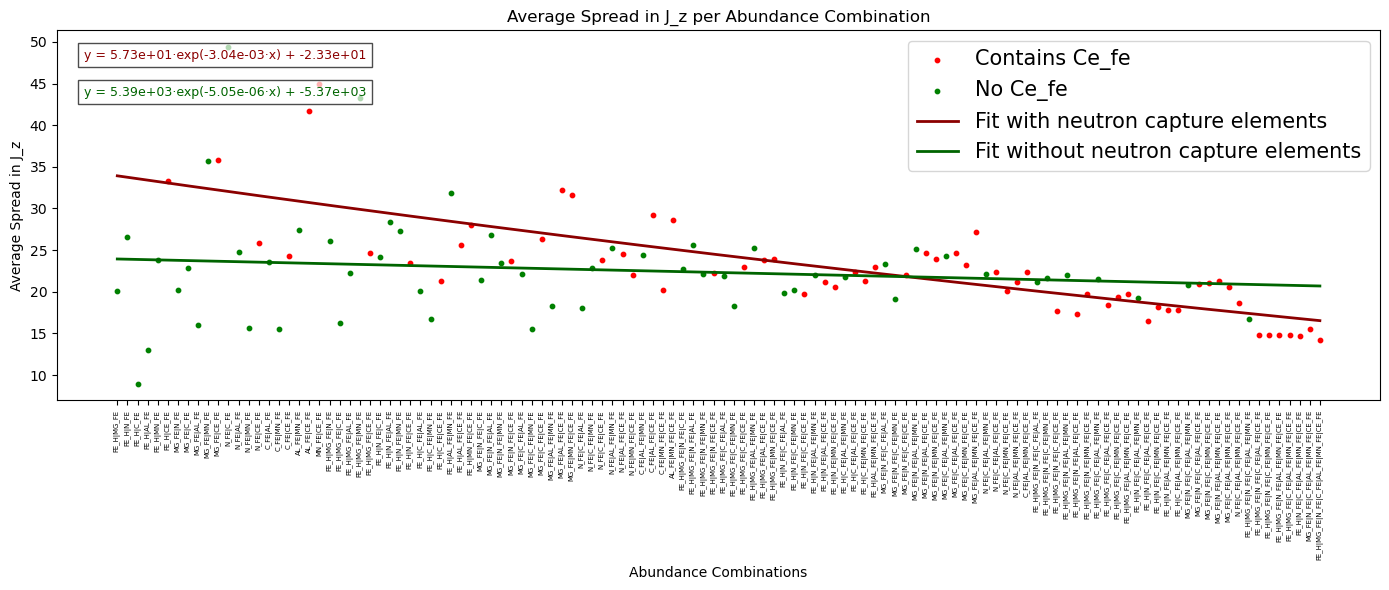

Average percent difference between fits: 1.44%


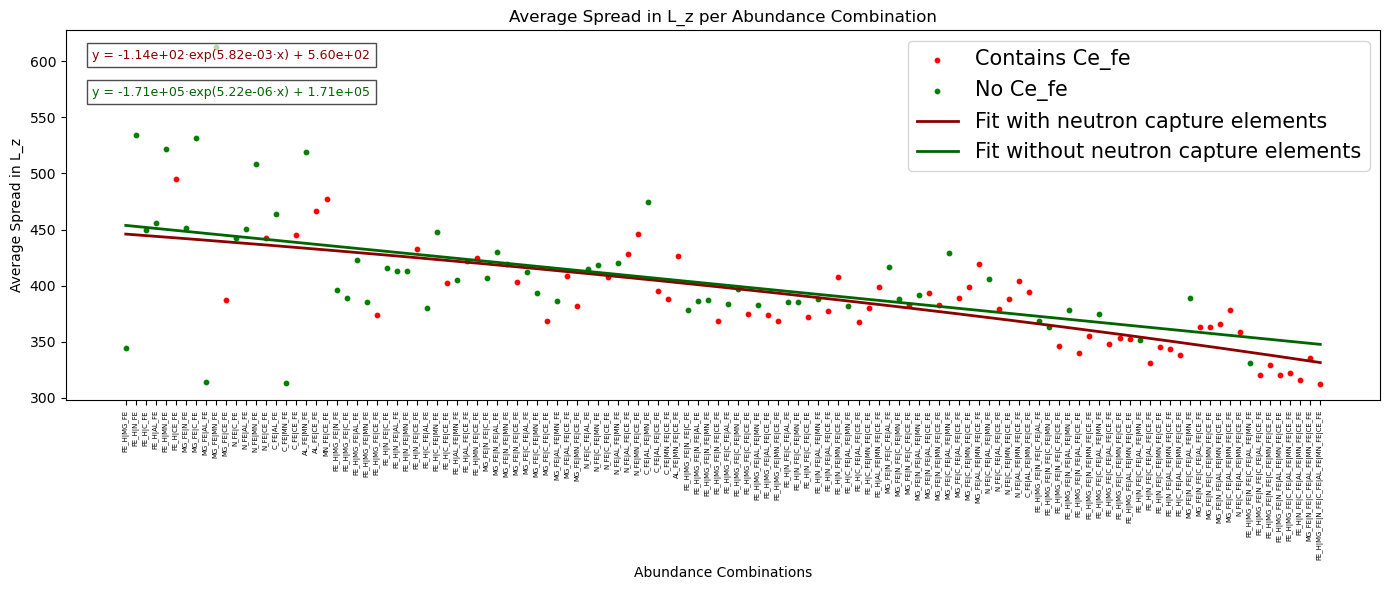

Average percent difference between fits: 6.91%


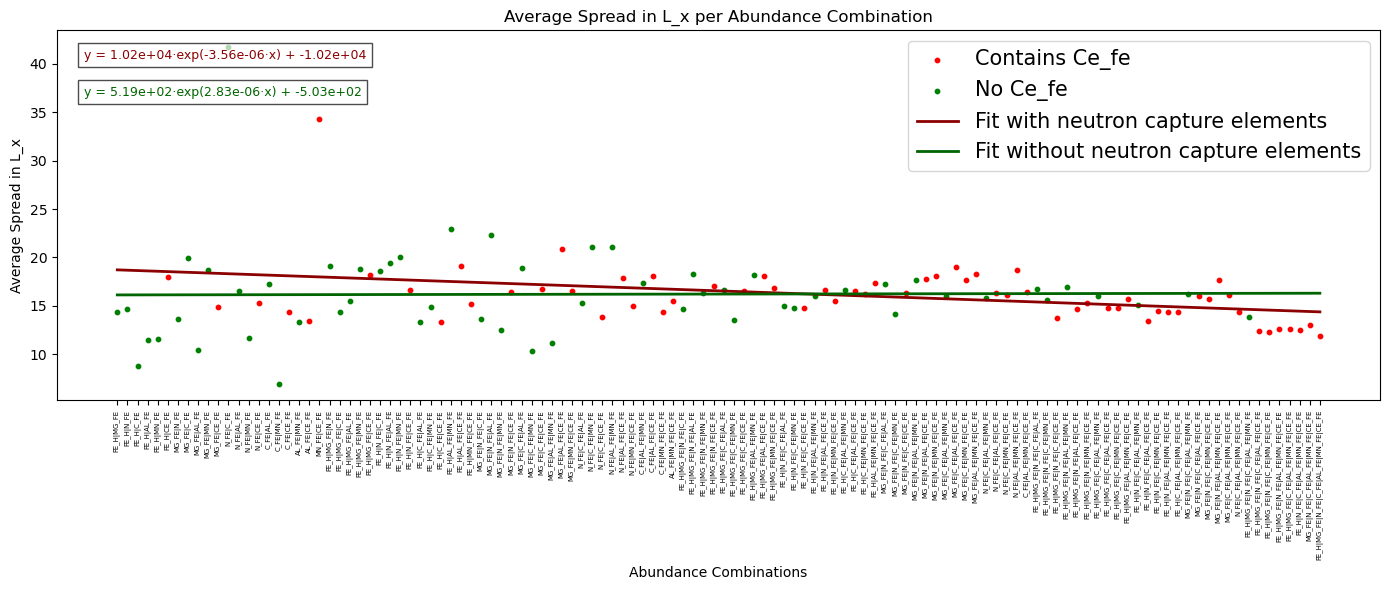

Average percent difference between fits: 6.45%


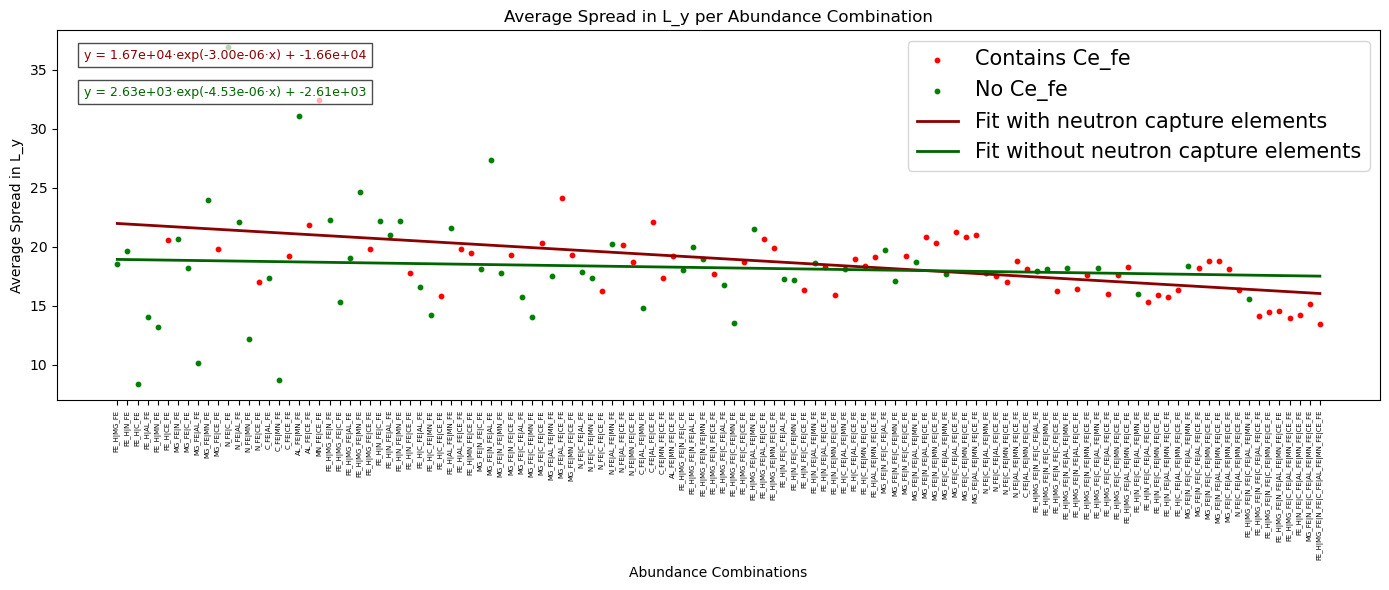

Average percent difference between fits: 100.00%


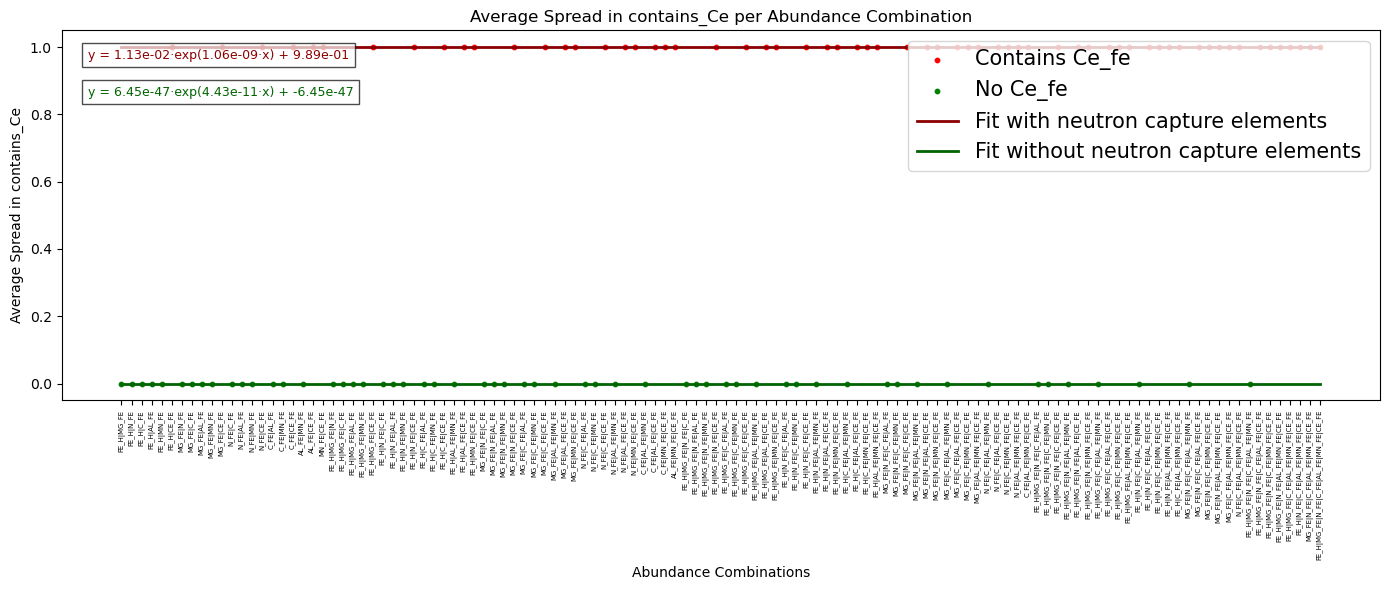

ValueError: could not convert string to float: 'FE_H|'

In [177]:
# Adjusted exponential fit code for loop of dynamical properties
for col in spread_summary.columns:
    if col == 'combo_tag':
        continue  # skips combo_tag column
    # Prepares data
    x_labels = spread_summary['combo_tag'].tolist()
    y_values = spread_summary[col].values
    x_numeric = np.arange(len(x_labels))  # numeric x for fitting
    y_values = np.array(y_values)
    
    # Splits by CE_FE
    red_x, red_y = [], []
    green_x, green_y = [], []
    
    for i, tag in enumerate(x_labels):
        if 'CE_FE' in tag:
            red_x.append(x_numeric[i])
            red_y.append(y_values[i])
        else:
            green_x.append(x_numeric[i])
            green_y.append(y_values[i])
    
    # Fits exponential model
    x_fit = np.linspace(0, len(x_labels)-1, 500)
    
    if len(red_x) >= 3:
        popt_red, _ = curve_fit(exp_func, red_x, red_y, p0=(1, 1e-6, 1), maxfev=10000)
        red_fit_y = exp_func(x_fit, *popt_red)
        red_eq = f"y = {popt_red[0]:.2e}·exp({popt_red[1]:.2e}·x) + {popt_red[2]:.2e}"
    
    if len(green_x) >= 3:
        popt_green, _ = curve_fit(exp_func, green_x, green_y, p0=(1, 1e-6, 1), maxfev=10000)
        green_fit_y = exp_func(x_fit, *popt_green)
        green_eq = f"y = {popt_green[0]:.2e}·exp({popt_green[1]:.2e}·x) + {popt_green[2]:.2e}"

    # Percent difference calculation
    if popt_red is not None and popt_green is not None:
        # Calculates percent difference across the same x_fit range
        y_red = exp_func(x_fit, *popt_red)
        y_green = exp_func(x_fit, *popt_green)

    percent_diff = (y_green - y_red) / y_red * 100  # relative to red
    avg_percent_diff = np.mean(np.abs(percent_diff))
    print(f"Average percent difference between fits: {avg_percent_diff:.2f}%")
    
    # Create the scatter plot
    plt.figure(figsize=(14, 6))
    point_colors = ['red' if 'CE_FE' in tag else 'green' for tag in x_labels]
    plt.scatter(red_x, red_y, color='red', s=10, label='Contains Ce_fe')
    plt.scatter(green_x, green_y, color='green', s=10, label='No Ce_fe')
    
    # Plot fits
    plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Fit with neutron capture elements')
    plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=9,
                 color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    
    plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Fit without neutron capture elements')
    plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=9,
                 color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    
    # Format x-axis with original labels
    plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)
    plt.xlabel("Abundance Combinations")
    plt.ylabel(f"Average Spread in {col}")
    plt.title(f"Average Spread in {col} per Abundance Combination")
    plt.legend(loc='upper right', fontsize=15)
    plt.tight_layout()
    plt.show()
        

#### Plotting the distribution of the average difference in variance for each dynamical property

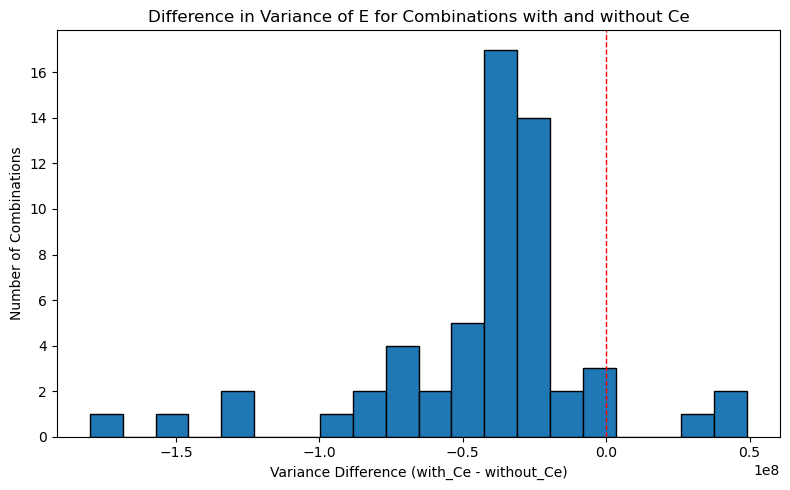

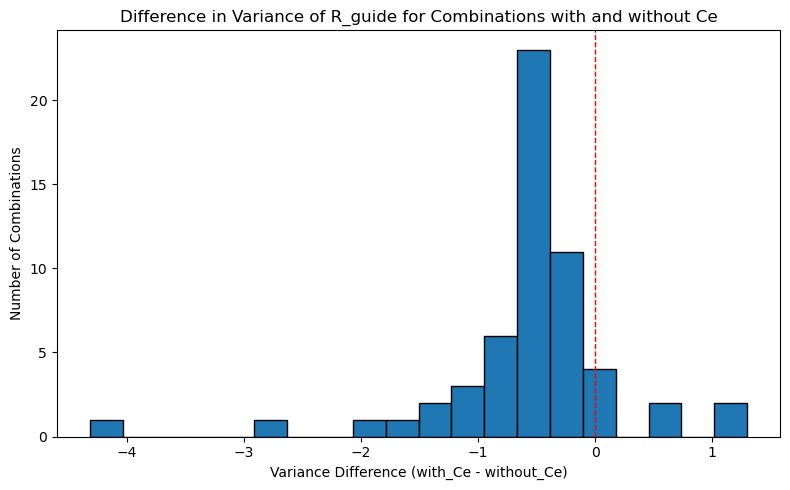

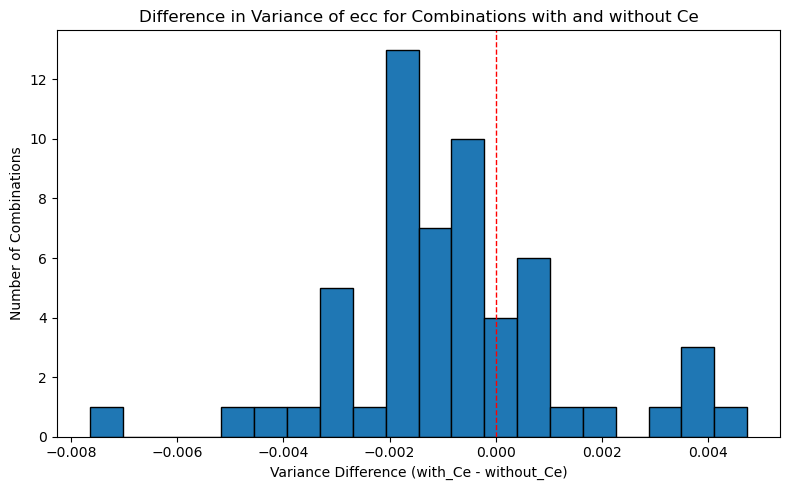

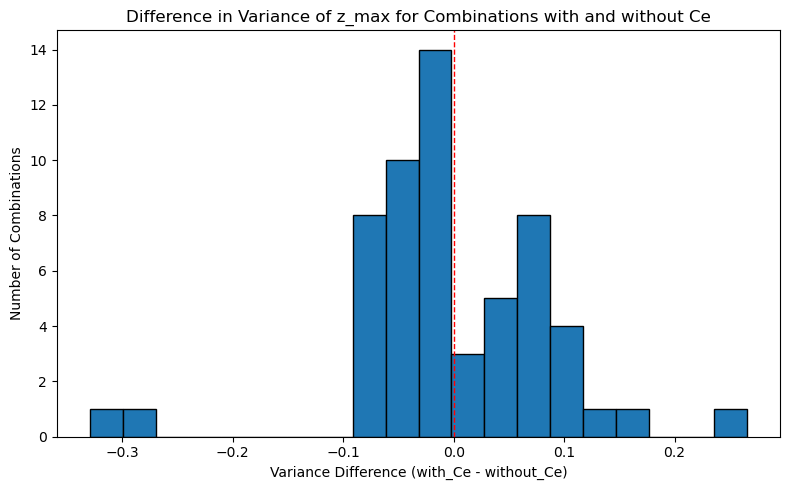

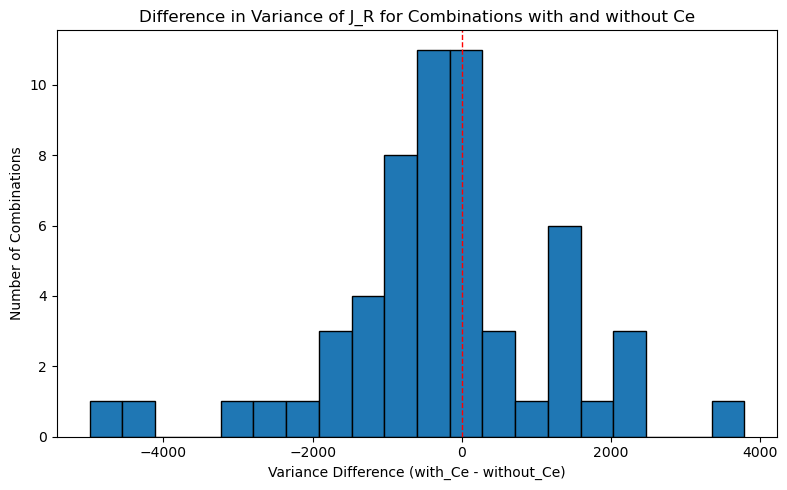

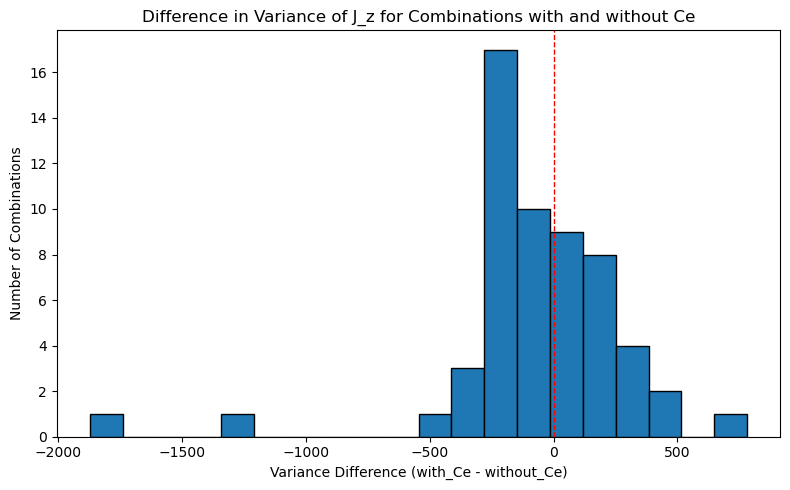

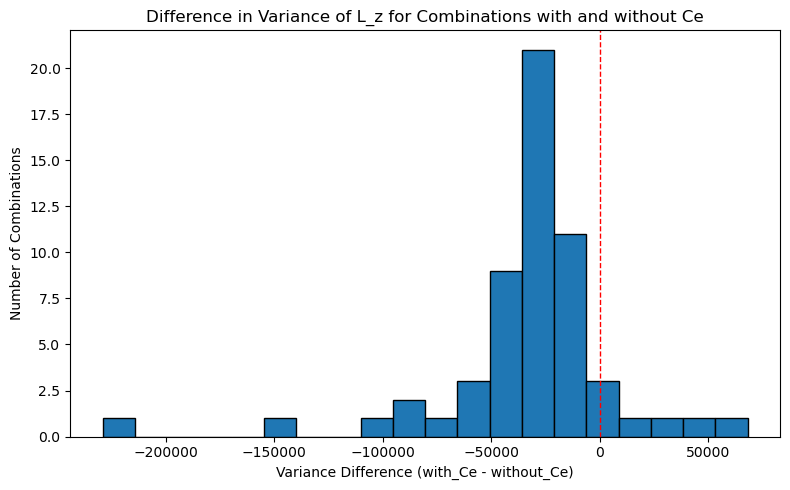

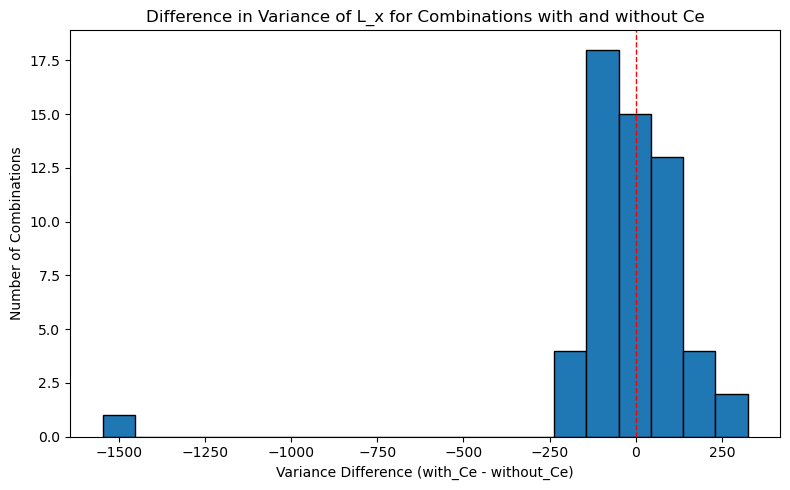

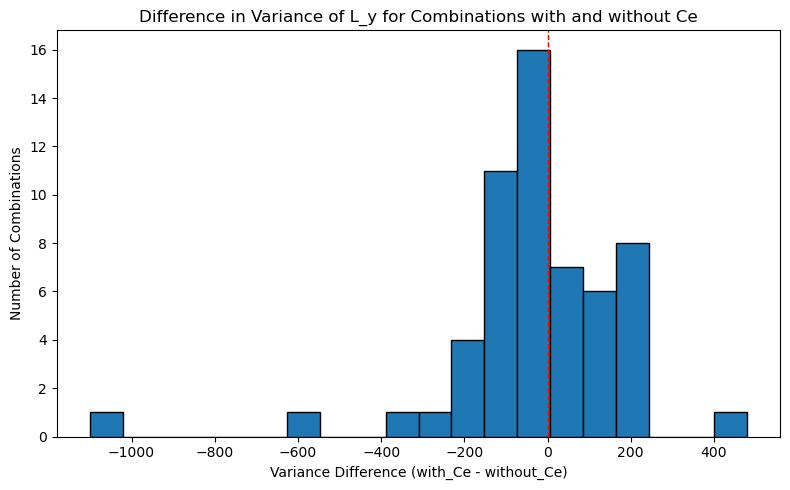

In [171]:
# Identifies whether combo contains Ce
spread_summary["contains_Ce"] = spread_summary["combo_tag"].str.contains("CE_FE", case=False, na=False)

# Creates "base" combo tag by removing CE_FE so we can match with/without Ce
spread_summary["combo_base"] = spread_summary["combo_tag"].str.replace(r"\|?CE_FE", "", regex=True)

# List of dynamical property columns (adjust if yours differ)
properties = ["E", "R_guide", "ecc", "z_max", "J_R", "J_z", "L_z", "L_x", "L_y"]

# Ensures all property columns are numeric
spread_summary[properties] = spread_summary[properties].apply(pd.to_numeric, errors="coerce")

for prop in properties:
    # Separates into Ce and no-Ce
    with_ce = spread_summary[spread_summary["contains_Ce"]][["combo_base", prop]].copy()
    without_ce = spread_summary[~spread_summary["contains_Ce"]][["combo_base", prop]].copy()
    
    # Renames columns
    with_ce = with_ce.rename(columns={prop: "std_with_Ce"})
    without_ce = without_ce.rename(columns={prop: "std_without_Ce"})
    
    # Merges to align Ce with no-Ce for the same base combo
    merged = pd.merge(without_ce, with_ce, on="combo_base", how="inner")
    
    # Computes variances
    merged["variance_no_Ce"] = merged["std_without_Ce"] ** 2
    merged["variance_with_Ce"] = merged["std_with_Ce"] ** 2
    
    # Computes difference
    merged["variance_diff"] = merged["variance_with_Ce"] - merged["variance_no_Ce"]
    
    # Accounts for case where one of the combos does not have a match
    if merged.empty:
        print(f"⚠ No matching Ce / no-Ce pairs found for {prop}")
        continue
    
    # Plots histogram
    plt.figure(figsize=(8, 5))
    plt.hist(merged["variance_diff"].dropna(), bins=20, edgecolor="black")
    plt.xlabel("Variance Difference (with_Ce - without_Ce)")
    plt.ylabel("Number of Combinations")
    plt.title(f"Difference in Variance of {prop} for Combinations with and without Ce")
    plt.axvline(0, color="red", linestyle="--", linewidth=1)
    plt.tight_layout()
    plt.show()